# Analise dos Microdados do Enem 2022 por classe social

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## Preparando os dados

In [2]:
dados_enem_2022 = pd.read_csv('dados_enem_2022.csv', sep=";")

dados_enem_2022.head(3)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_PROVA,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,pessoas_na_casa,renda_mensal,telefone_celular,computador_na_casa,acesso_internet,nota_media_final,classe_social
0,210057943671,Entre 41 e 45 anos,Masculino,Casado(a)/Mora com companheiro(a),Preta,Brasileiro(a),Já concluí o Ensino Médio,Não Respondeu,Não,Brasília,...,0.0,0,0.0,3,"Até R$ 1.212,00",Não,Não,Não,0.00,D
1,210057516120,Entre 41 e 45 anos,Masculino,Casado(a)/Mora com companheiro(a),Branca,Brasileiro(a),Já concluí o Ensino Médio,Não Respondeu,Não,Brasília,...,0.0,0,0.0,3,"Acima de R$ 24.240,00","Sim, quatro ou mais","Sim, quatro ou mais",Sim,0.00,A
2,210057280536,20 anos,Feminino,Solteiro(a),Preta,Brasileiro(a),Já concluí o Ensino Médio,Não Respondeu,Não,Presidente Tancredo Neves,...,565.3,Sem problemas,760.0,2,"Até R$ 1.212,00","Sim, dois",Não,Sim,558.24,D


In [3]:
dados_enem_2022.shape[0]

3476105

In [4]:
dados_enem_2022.dtypes

NU_INSCRICAO            int64
TP_FAIXA_ETARIA        object
TP_SEXO                object
TP_ESTADO_CIVIL        object
TP_COR_RACA            object
TP_NACIONALIDADE       object
TP_ST_CONCLUSAO        object
TP_ESCOLA              object
IN_TREINEIRO           object
NO_MUNICIPIO_PROVA     object
SG_UF_PROVA            object
dia_1                  object
dia_2                  object
NU_NOTA_CN            float64
NU_NOTA_CH            float64
NU_NOTA_LC            float64
NU_NOTA_MT            float64
TP_STATUS_REDACAO      object
NU_NOTA_REDACAO       float64
pessoas_na_casa        object
renda_mensal           object
telefone_celular       object
computador_na_casa     object
acesso_internet        object
nota_media_final      float64
classe_social          object
dtype: object

Estratificação dos domicílios em 2022:

Classe A: 2,8% (renda mensal domiciliar superior a R$ 22 mil)

Classe B: 13,2% (renda mensal domiciliar entre R$ 7,1 mil e R$ 22 mil)

Classe C: 33,3% (renda mensal domiciliar entre R$ 2,9 mil e R$ 7,1 mil)

Classes D/E: 50,7% (renda mensal domiciliar até R$ 2,9 mil)

Fonte: https://www.infomoney.com.br/minhas-financas/classes-d-e-e-continuarao-a-ser-mais-da-metade-da-populacao-ate-2024-projeta-consultoria/

In [5]:
# Criando Dicionário Classe social com base nos números
classe_social = {
    'Nenhuma Renda': 'E',
    'Até R$ 1.212,00': 'D',
    'De R$ 1.212,01 até R$ 1.818,00': 'D',
    'De R$ 1.818,01 até R$ 2.424,00': 'D',
    'De R$ 2.424,01 até R$ 3.030,00': 'D',
    'De R$ 3.030,01 até R$ 3.636,00': 'C',
    'De R$ 3.636,01 até R$ 4.848,00': 'C',
    'De R$ 4.848,01 até R$ 6.060,00': 'C',
    'De R$ 6.060,01 até R$ 7.272,00': 'C',
    'De R$ 7.272,01 até R$ 8.484,00': 'B',
    'De R$ 8.484,01 até R$ 9.696,00': 'B',
    'De R$ 9.696,01 até R$ 10.908,00': 'B',
    'De R$ 10.908,01 até R$ 12.120,00': 'B',
    'De R$ 12.120,01 até R$ 14.544,00': 'B',
    'De R$ 14.544,01 até R$ 18.180,00': 'B',
    'De R$ 18.180,01 até R$ 24.240,00': 'A',
    'Acima de R$ 24.240,00': 'A'
}

# Criando a coluna classe social
dados_enem_2022['classe_social'] = dados_enem_2022['renda_mensal'].map(classe_social)

In [6]:
estados_regioes = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

# Criando a coluna regiões do Brasil
dados_enem_2022['Regiao'] = dados_enem_2022['SG_UF_PROVA'].map(estados_regioes)

In [7]:
dict_label_idade = {
    'Menor de 17 anos': 'Menor de 17 anos',
    '17 anos': 'Entre 17 e 18 anos',
    '18 anos': 'Entre 17 e 18 anos',
    '19 anos': 'Entre 19 e 24 anos',
    '20 anos': 'Entre 19 e 24 anos',
    '21 anos': 'Entre 19 e 24 anos',
    '22 anos': 'Entre 19 e 24 anos',
    '23 anos': 'Entre 19 e 24 anos',
    '24 anos': 'Entre 19 e 24 anos',
    '25 anos': 'Entre 25 e 30 anos',
    'Entre 26 e 30 anos': 'Entre 25 e 30 anos',
    'Entre 31 e 35 anos': 'Entre 31 e 40 anos',
    'Entre 36 e 40 anos': 'Entre 31 e 40 anos',
    'Entre 41 e 45 anos': 'Entre 41 e 50 anos',
    'Entre 46 e 50 anos': 'Entre 41 e 50 anos',
    'Entre 51 e 55 anos': 'Entre 51 e 60 anos',
    'Entre 56 e 60 anos': 'Entre 51 e 60 anos',
    'Entre 61 e 65 anos': 'Acima de 61',
    'Entre 66 e 70 anos': 'Acima de 61',
    'Maior de 70 anos': 'Acima de 61'
}

# Criando a coluna regiões do Brasil
dados_enem_2022['label_idade'] = dados_enem_2022['TP_FAIXA_ETARIA'].map(dict_label_idade)

In [8]:
dict_celular_computador = {
    'Não': 'Não',
    'Sim, um': 'Sim',
    'Sim, dois': 'Sim',
    'Sim, três': 'Sim',
    'Sim, quatro ou mais': 'Sim'
}

lista_aprelhos_eletronicos = ['telefone_celular', 'computador_na_casa']

for aparelho in lista_aprelhos_eletronicos:
    dados_enem_2022[aparelho] = dados_enem_2022[aparelho].map(dict_celular_computador)

In [9]:
dados_sem_zeros = dados_enem_2022.query("nota_media_final != 0 and NU_NOTA_MT != 0 and NU_NOTA_CN != 0 and NU_NOTA_CH != 0 and NU_NOTA_LC != 0 and NU_NOTA_REDACAO != 0")

dados_sem_zeros.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_PROVA,...,NU_NOTA_REDACAO,pessoas_na_casa,renda_mensal,telefone_celular,computador_na_casa,acesso_internet,nota_media_final,classe_social,Regiao,label_idade
2,210057280536,20 anos,Feminino,Solteiro(a),Preta,Brasileiro(a),Já concluí o Ensino Médio,Não Respondeu,Não,Presidente Tancredo Neves,...,760.0,2,"Até R$ 1.212,00",Sim,Não,Sim,558.24,D,Nordeste,Entre 19 e 24 anos
3,210055724397,21 anos,Masculino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,Não Respondeu,Não,Cariacica,...,320.0,3,Nenhuma Renda,Sim,Sim,Sim,394.62,E,Sudeste,Entre 19 e 24 anos
7,210055778089,21 anos,Feminino,Solteiro(a),Preta,Brasileiro(a),Já concluí o Ensino Médio,Não Respondeu,Não,São Gonçalo,...,440.0,5,"Até R$ 1.212,00",Sim,Não,Sim,414.10,D,Sudeste,Entre 19 e 24 anos
9,210055461467,19 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,Não Respondeu,Não,Arcoverde,...,360.0,2,"Até R$ 1.212,00",Sim,Não,Sim,438.10,D,Nordeste,Entre 19 e 24 anos
11,210054972570,17 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Privada,Não,Nossa Senhora da Glória,...,940.0,4,"Até R$ 1.212,00",Sim,Não,Sim,576.70,D,Nordeste,Entre 17 e 18 anos


## Funções de Apoio para gerar os Gráficos

In [10]:
def grafico_kpi(df, titulo):
    # Calcule o número total de inscritos
    numero_total_inscritos = df.shape[0]

    # Crie uma figura com um fundo colorido
    fig = plt.figure(figsize=(4, 4), facecolor='white')  # Use a cor de fundo desejada

    # Crie um gráfico de rosca dentro da figura
    ax = fig.add_subplot(111, projection="polar")

    size = 0.01
    vals = np.array([[numero_total_inscritos, 0.]])  # Apenas uma fatia para o número total de inscritos
    # Normalize vals to 2 pi
    valsnorm = vals / np.sum(vals) * 2 * np.pi
    # Obtain the ordinates of the bar edges
    valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

    cmap = plt.get_cmap('rocket')
    colors = cmap([0, 0])  # Defina as cores da fatia exterior e interior

    ax.bar(x=valsleft[:, 0],
           width=valsnorm.sum(axis=1), bottom=1 - size, height=size,
           color=colors, edgecolor='red', linewidth=0, align="edge")

    ax.set(title=titulo)

    # Adicione o número total no centro do gráfico
    plt.text(0, 0, f'{numero_total_inscritos}', fontsize=22, color='white', va='center', ha='center',
                                    bbox=dict(facecolor='gray', edgecolor='none', boxstyle='round,pad=0.2'))

    # Remova as marcações, ângulos e linhas cinzas
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.spines['polar'].set_visible(False)
    
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Salvando a figura com o nome do título
    fig.savefig(f'{titulo}.png', transparent=False, dpi=300, bbox_inches='tight')

    ax.set_axis_off()

    plt.show()

In [65]:
def gerar_mapa_de_calor(df, index, columns, values, titulo):
    # Criar uma tabela dinâmica com médias das notas
    heatmap_data = df.pivot_table(index=index, columns=columns, values=values, aggfunc='mean')

    # Definir estilo do gráfico
    sns.set_theme(style="darkgrid")

    # Criar um heatmap
    plt.figure(figsize=(10, 4))
    sns.heatmap(data=heatmap_data, annot=True, fmt=".2f", cmap="rocket")

    # Definir rótulos dos eixos
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(titulo)
    plt.xticks(rotation=0)
    
    # Salvando a figura com o nome do título
    plt.savefig(f'{titulo}.png', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir o gráfico
    plt.show()

In [12]:
def gerar_contagem(df, feature):
    
    lista_classes_sociais = df['classe_social'].unique().tolist()
    lista_valores_feature = df[feature].unique().tolist()

    dados_por_classe_feature = pd.DataFrame(columns=lista_valores_feature, index=lista_classes_sociais)

    for valor in lista_valores_feature:
        dados = df.query(f"{feature} == @valor")
        for classe in lista_classes_sociais:
            dados_classe = dados.query("classe_social == @classe").shape[0]
            dados_por_classe_feature.loc[classe, valor] = dados_classe

    dados_por_classe_feature = dados_por_classe_feature.sort_index(ascending=True)

    return dados_por_classe_feature

In [13]:
def gerar_dados_por_classe_feature(dados_presente_na_prova, feature):
    lista_classes_sociais = dados_presente_na_prova['classe_social'].unique().tolist()
    lista_feature = dados_presente_na_prova[feature].unique().tolist()

    dados_por_classe_feature = pd.DataFrame(index=lista_classes_sociais)

    for i in lista_feature:
        dados = dados_presente_na_prova.query(f"{feature} == @i")
        for classe in lista_classes_sociais:
            dados_classe = dados.query("classe_social == @classe")['nota_media_final'].mean().round(2)
            dados_por_classe_feature.loc[classe, i] = dados_classe

    dados_por_classe_feature = dados_por_classe_feature.sort_index(ascending=True)
    return dados_por_classe_feature

In [14]:
def gerar_grafico_area(df, title, ax=None):

    # Calcular os percentuais
    dados_por_classe_internet_percent = df.div(df.sum(axis=1), axis=0) * 100

    # Definir estilo do gráfico
    sns.set_theme(style="darkgrid")
    
    # Definir a paleta de cores como "rocket"
    sns.set_palette("rocket")

    # Criar o gráfico de área no subplot fornecido ou em um novo subplot
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    dados_por_classe_internet_percent.plot(kind='area', stacked=False, alpha=0.7, ax=ax)

    # Adicionar rótulos de dados manualmente com fundo
    for column in dados_por_classe_internet_percent.columns:
        for idx, value in enumerate(dados_por_classe_internet_percent[column]):
            if not pd.isna(value):
                ax.annotate(f'{value:.2f}%',  # Valor do rótulo formatado
                            xy=(idx, value),  # Posição do rótulo
                            xytext=(0, 3),  # Ajuste vertical do rótulo
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=9,
                            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
                
                # Adicionar linha pontilhada vermelha
                ax.plot([idx, idx], [0, value], color='red', linestyle='dashed', linewidth=0.5)

    # Definir rótulos dos eixos
    ax.set_xlabel("Classe Social")
    ax.set_ylabel("Percentual")
    ax.set_title(title)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.index, rotation=0)

    # Remover as linhas de grade manualmente
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Exibir a legenda fora da figura
    legenda = ax.legend(title=None, loc='upper left', bbox_to_anchor=(1, 1))
    
    # Salvando a figura com o nome do título
    fig.savefig(f'{title}.png', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir o gráfico
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

In [15]:
def gerar_matriz_correlacao_notas(df):

    # Lista de matérias
    lista_materias = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'nota_media_final']
    lista_labels_notas = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Nota Final']

    # Selecionar apenas as colunas das matérias
    notas = df[lista_materias]

    # Calcular a matriz de correlação com rótulos personalizados
    correlation_matrix = notas.corr()

    # Definir estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Plotar o mapa de calor da matriz de correlação com rótulos personalizados
    plt.figure(figsize=(8, 4))
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=0.5)

    # Definir rótulos personalizados para os eixos x e y
    heatmap.set_xticklabels(lista_labels_notas, rotation=90)
    heatmap.set_yticklabels(lista_labels_notas, rotation=0)
    
    # Salvando a figura com o nome do título
    plt.savefig('Matriz de Correlação entre as Notas.png', transparent=False, dpi=300, bbox_inches='tight')

    plt.title('Matriz de Correlação entre as Notas')
    plt.show()

In [16]:
def gerar_grafico_barras_estado(df):
    # Lista de matérias
    lista_materias = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'nota_media_final']
    lista_labels_notas = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Nota Final']

    # Definir estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Calcular o número de linhas e colunas
    num_linhas = len(lista_materias) // 2 + len(lista_materias) % 2
    num_cols = 2

    # Criar subplots para cada matéria com 2 colunas por linha
    fig, axes = plt.subplots(nrows=num_linhas, ncols=num_cols, figsize=(16, 5 * num_linhas))

    # Loop através das matérias e gerar os gráficos de barras
    for i, materia in enumerate(lista_materias):
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]

        if materia == 'nota_media_final':
            # Calcular a média das notas finais por estado
            media_notas_por_estado = df.groupby('SG_UF_PROVA')[materia].mean()
            media_notas_por_estado = media_notas_por_estado.sort_values(ascending=False)

            # Plotar gráfico de barras das médias das notas finais por estado
            sns.barplot(x=media_notas_por_estado.index, y=media_notas_por_estado.values, ax=ax, palette="crest")
            ax.set_xlabel(None)
            ax.set_title('Média da Nota Final por Estado')
            
            # Diminuir o tamanho da fonte dos rótulos dos estados
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=8)
            
            # Adicionar rótulos de dados (valores) nas barras
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=9, color='black', xytext=(5, 0.5),
                            textcoords='offset points', rotation=45, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
        else:
            # Calcular a média das notas da matéria por estado
            media_notas_por_estado = df.groupby('SG_UF_PROVA')[materia].mean()
            media_notas_por_estado = media_notas_por_estado.sort_values(ascending=False)

            # Plotar gráfico de barras das médias das notas da matéria por estado
            sns.barplot(x=media_notas_por_estado.index, y=media_notas_por_estado.values, ax=ax, palette="rocket")
            ax.set_xlabel(None)
            ax.set_title(f'Média da Nota de {lista_labels_notas[i]} por Estado')
            
            # Diminuir o tamanho da fonte dos rótulos dos estados
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=8)
            
            # Adicionar rótulos de dados (valores) nas barras
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=9, color='black', xytext=(5, 0.5),
                            textcoords='offset points', rotation=45, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

        ax.yaxis.grid(False)
        ax.xaxis.grid(False)
    
    # Salvando a figura com o nome do título
    fig.savefig('Média da Nota por estado.png', transparent=False, dpi=300, bbox_inches='tight')

    # Ajustar layout
    plt.tight_layout()

    # Exibir os subplots
    plt.show()

In [17]:
def gerar_grafico_area_comparativo(dados, lista_dias):
    # Cria uma figura com subplots para os dias
    num_dias = len(lista_dias)
    fig, axs = plt.subplots(1, num_dias, figsize=(12, 5))

    for i, dia in enumerate(lista_dias):
        # Calcular os percentuais para o dia atual
        df = gerar_contagem(dados, dia)
        dados_por_classe_internet_percent = df.div(df.sum(axis=1), axis=0) * 100

        # Definir estilo do gráfico
        sns.set_theme(style="darkgrid")
        
        sns.set_palette("rocket")

        # Criar o gráfico de área no subplot correspondente
        ax = axs[i]
        dados_por_classe_internet_percent.plot(kind='area', stacked=False, alpha=0.7, ax=ax)

        # Adicionar rótulos de dados manualmente com fundo
        for column in dados_por_classe_internet_percent.columns:
            for idx, value in enumerate(dados_por_classe_internet_percent[column]):
                if not pd.isna(value):
                    ax.annotate(f'{value:.2f}%',  # Valor do rótulo formatado
                                xy=(idx, value),  # Posição do rótulo
                                xytext=(0, 3),  # Ajuste vertical do rótulo
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=9,
                                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

                    # Adicionar linha pontilhada vermelha
                    ax.plot([idx, idx], [0, value], color='red', linestyle='dashed', linewidth=0.5)

        # Definir rótulos dos eixos
        ax.set_xlabel("Classe Social")
        ax.set_ylabel("Percentual")
        ax.set_title(f'Percentual de inscritos presente no {dia}')
        ax.set_xticks(range(len(df)))
        ax.set_xticklabels(df.index, rotation=0)

        # Remover as linhas de grade manualmente
        ax.yaxis.grid(False)
        ax.xaxis.grid(False)

        # Exibir a legenda fora da figura
        legenda = ax.legend(title=None, loc='upper left', bbox_to_anchor=(1, 1))

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    
    # Salvando a figura com o nome do título
    fig.savefig('Gráfico de Area - Percentual de inscritos.png', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir o gráfico
    plt.show()

In [18]:
def gerar_boxplot_comparativo(df):
    # Definir estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Ordenar os dados por 'classe_social' de forma alfabética
    df = df.sort_values(by='classe_social')

    # Lista de matérias
    lista_materias = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'nota_media_final']
    lista_labels_notas = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Nota Final']

    # Definir o número de linhas e colunas de subplots
    num_linhas = len(lista_materias) // 2 + len(lista_materias) % 2
    num_colunas = 2

    # Criar subplots
    fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, 8))

    # Paleta de cores para os gráficos
    palette = sns.color_palette("rocket", n_colors=len(df['classe_social'].unique()))

    # Iterar sobre as matérias e criar um gráfico para cada uma
    for i, materia in enumerate(lista_materias):
        linha = i // num_colunas
        coluna = i % num_colunas

        ax = axs[linha, coluna]

        if materia == 'nota_media_final':
            # Paleta de cores diferente para a nota média final
            ax = sns.boxplot(data=df, x='classe_social', y=materia, ax=ax, palette='crest')
        else:
            ax = sns.boxplot(data=df, x='classe_social', y=materia, ax=ax, palette=palette)

        ax.set_xlabel("Classe Social")
        ax.set_ylabel("Nota Média")
        ax.set_title(f"Distribuição das Notas de {lista_labels_notas[i]} por Classe Social")

        ax.yaxis.grid(False)
        ax.xaxis.grid(False)

        plt.xticks(rotation=0)

    plt.tight_layout()
    
    # Salvando a figura com o nome do título
    fig.savefig('Boxplot - Distribuição das Notas por Classe Social.png', transparent=False, dpi=300, bbox_inches='tight')
    
    plt.show()

In [19]:
def gerar_grafico_dispersao(df):
    # Lista de matérias
    lista_materias = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
    lista_labels_notas = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

    # Definir estilo do gráfico
    sns.set_theme(style="whitegrid")

    dados_amostra = df.sample(frac=0.1)

    palette = sns.color_palette("rocket", n_colors=len(dados_amostra['classe_social'].unique()))

    # Ordenar as classes sociais alfabeticamente
    class_labels_sorted = sorted(dados_amostra['classe_social'].unique())

    # Criar subplots para cada matéria com 2 colunas por linha
    num_cols = 3
    num_rows = (len(lista_materias) + num_cols - 1) // num_cols

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 4 * num_rows))

    # Loop através das matérias e criar os gráficos
    for i, materia in enumerate(lista_materias):
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]

        sns.scatterplot(data=dados_amostra, x=materia, y='nota_media_final', hue='classe_social', ax=ax, s=10, palette=palette, hue_order=class_labels_sorted)

        # Configurar título e rótulos
        ax.set_title(f'Média de Notas em {lista_labels_notas[i]} por Classe Social')  # Usar os rótulos personalizados
        ax.set_xlabel(lista_labels_notas[i])  # Usar os rótulos personalizados
        ax.set_ylabel('Nota Média Final')

        # Configurar legenda
        ax.legend(title='Classe Social', loc='upper right', bbox_to_anchor=(1.2, 1))

        # Remover as linhas de grade manualmente
        ax.yaxis.grid(False)
        ax.xaxis.grid(False)

    # Ajustar layout
    plt.tight_layout(rect=[0, 0, 0.95, 1])
    
    # Salvando a figura com o nome do título
    fig.savefig('Gráfico de dispersão - Média das Notas.png', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir os subplots
    plt.show()

In [20]:
def gerar_grafico_barras_classe_social_comparativo(dados, feature, label):
    # Agrupe os dados por classe social e feature, calcule a média da nota_media_final e arredonde para 2 casas decimais
    df = dados.groupby(['classe_social', feature])['nota_media_final'].mean().unstack().round(2)

    # Ordene as linhas do DataFrame pela classe social
    df = df.sort_index(ascending=True)

    # Definir estilo do gráfico
    sns.set_theme(style="whitegrid")

    lista_classes = ['A', 'B', 'C', 'D', 'E']

    # Definir o número de gráficos por linha
    num_cols = 2

    # Calcular o número de linhas
    num_rows = (len(lista_classes) + num_cols - 1) // num_cols

    # Criar subplots com várias colunas
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8*num_cols, 3*num_rows))

    for i, classe in enumerate(lista_classes):
        # Calcular o índice da linha e da coluna
        row_idx = i // num_cols
        col_idx = i % num_cols

        # Selecionar o subplot atual
        ax = axes[row_idx, col_idx]

        # Filtrar os dados e ordenar colunas pelo maior valor
        dados_classe = df.query("index == @classe")
        dados_classe = dados_classe[dados_classe.mean().sort_values(ascending=False).index]

        # Criar o gráfico de barras no subplot atual
        dados_classe.plot(kind='bar', width=1.8, alpha=0.7, ax=ax, colormap='rocket')  # Defina a largura das barras aqui

        # Exibir rótulos de dados nas barras
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}',  # Valor do rótulo formatado
                        xy=(p.get_x() + p.get_width() / 2, height),  # Posição do rótulo
                        xytext=(0, -1),  # Ajuste vertical do rótulo
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

        # Definir rótulos dos eixos
        ax.set_ylabel("Nota Média")
        ax.set_xlabel("Classe Social")
        ax.set_title(f"Nota Média por {label} - Classe {classe}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

        # Exibir a legenda
        legenda = ax.legend(title=None, loc='upper left', bbox_to_anchor=(1.0, 1.0))

        # Remover as bordas dos eixos e linhas de grade
        sns.despine(ax=ax, fig=None, offset=False)

        # Remover as linhas de grade manualmente
        ax.yaxis.grid(False)
        ax.xaxis.grid(False)

    # Ajustar o layout para garantir que as legendas não sejam cortadas
    plt.tight_layout(rect=[0, 0, 0.95, 1])

    # Salvando a figura com o nome do título
    fig.savefig(f'Gráfico de barras classes comparativo por {feature}', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir os subplots
    plt.show()

In [21]:
def gerar_grafico_linhas(df, titulo):
    # Criar figura e eixos
    fig, ax = plt.subplots(figsize=(8, 4))

    # Definir manualmente uma paleta de cores em degradê
    palette = sns.color_palette("rocket", n_colors=len(df.columns))

    # Plotar as médias das notas em MT por renda com cores em degradê e pontos mais visíveis
    for i, column in enumerate(df.columns):
        sns.lineplot(data=df, x=df.index, y=column, ax=ax, color=palette[i], label=column)

    # Adicionar marcadores aos pontos e torná-los mais visíveis
    for i, column in enumerate(df.columns):
        sns.scatterplot(data=df, x=df.index, y=column, color=palette[i], marker='o', s=50)

    # Configurar os rótulos e títulos
    plt.title(titulo)
    plt.xlabel('Classe Social')
    plt.ylabel('Quantidade de Inscritos')
    plt.xticks(rotation=0)

    # Remover as linhas de grade manualmente
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Ajustar layout
    plt.tight_layout(rect=[0, 0, 0.95, 1])

    # Salvando a figura com o nome do título
    fig.savefig(f'{titulo}.png', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir o gráfico
    plt.legend(title=None , loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [22]:
def gerar_grafico_media_notas_final(df):
    
    # Agrupar os dados por renda e calcular a média de notas por prova
    nota_final_por_renda = pd.DataFrame(df.groupby('classe_social')['nota_media_final'].mean().round(2))

    # Criar figura e eixos
    fig, ax = plt.subplots(figsize=(8, 3))

    # Ordenar as classes sociais pela média de notas
    nota_final_por_renda_sorted = nota_final_por_renda.sort_values(by='nota_media_final', ascending=False)

    # Definir uma paleta de cores de degradê
    palette = sns.color_palette("rocket", n_colors=len(nota_final_por_renda_sorted))

    # Calcular a largura das barras e a localização das barras
    bar_width = 0.4
    bar_positions = np.arange(len(nota_final_por_renda_sorted))

    # Plotar as médias das notas em MT por renda com cores em degradê
    for i, (index, row) in enumerate(nota_final_por_renda_sorted.iterrows()):
        plt.bar(bar_positions[i], row['nota_media_final'], color=palette[i], width=bar_width, label=index)

    # Adicionar os rótulos de dados nas barras
    for i, (index, row) in enumerate(nota_final_por_renda_sorted.iterrows()):
        plt.text(bar_positions[i] + bar_width / 2, row['nota_media_final'], round(row['nota_media_final'], 2), ha='center', va='bottom', color='black', fontsize=9,
                                    bbox=dict(facecolor='lightgray', edgecolor='none', boxstyle='round,pad=0.2'))

    # Adicionar linhas conectando as barras
    for i in range(1, len(bar_positions)):
        plt.plot([bar_positions[i - 1] + bar_width / 2, bar_positions[i] + bar_width / 2],
                [nota_final_por_renda_sorted.iloc[i - 1]['nota_media_final'], nota_final_por_renda_sorted.iloc[i]['nota_media_final']],
                color='gray', linestyle='--', linewidth=2)

    # Configurar os rótulos e títulos
    plt.title('Média de Notas Finais por Classe Social')
    plt.xlabel('Classe Social (Renda Mensal)')
    plt.ylabel('Média de Notas Finais')
    plt.xticks(bar_positions + bar_width / 3, nota_final_por_renda_sorted.index, rotation=0, ha='right')

    # Remover as linhas de grade manualmente
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Exibir o gráfico
    plt.tight_layout()

    # Salvando a figura com o nome do título
    fig.savefig('Gráfico de barras com linhas - Nota Média Final.png', transparent=False, dpi=300, bbox_inches='tight')

    plt.show()

In [23]:
def gerar_grafico_barras_horizontais_rank(df, feature, label, titulo, operacao=lambda x: x.mean(), ascend=True):
    # Calcular a operação desejada nas notas finais por estado
    resultado_operacao = df.groupby(feature)['nota_media_final'].agg(operacao).sort_values(ascending=ascend)
    
    # Definir estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Criar figura e eixos para o gráfico
    fig, ax = plt.subplots(figsize=(6, 3))

    # Gráfico de barras horizontais
    sns.barplot(x=resultado_operacao[:3].values, y=resultado_operacao[:3].index, ax=ax, palette="rocket")
    ax.set_xlabel(None)
    ax.set_ylabel(label)
    ax.set_title(titulo)

    # Adicionar rótulos de dados nas barras
    for i, v in enumerate(resultado_operacao[:3].values):
        ax.text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=10,
                bbox=dict(facecolor='lightgray', edgecolor='none', boxstyle='round,pad=0.2'))

    # Ajustar layout
    plt.tight_layout()
    
    # Remover as linhas de grade manualmente
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Salvando a figura com o nome do título
    fig.savefig(f'Grafico de barras horizontais rank - {titulo}.png', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir o gráfico
    plt.show()

In [24]:
def gerar_grafico_barras_horizontais(df, feature, label, titulo, operacao=lambda x: x.mean(), ascend=True, figsize=(6, 12)):
    # Calcular a operação desejada nas notas finais por estado
    resultado_operacao = df.groupby(feature)['nota_media_final'].agg(operacao).sort_values(ascending=ascend)
    
    # Definir estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Criar figura e eixos para o gráfico
    fig, ax = plt.subplots(figsize=figsize)

    # Gráfico de barras horizontais
    sns.barplot(x=resultado_operacao.values, y=resultado_operacao.index, ax=ax, palette="rocket")
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(titulo)

    # Adicionar rótulos de dados nas barras
    for i, v in enumerate(resultado_operacao.values):
        ax.text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=10,
                bbox=dict(facecolor='lightgray', edgecolor='none', boxstyle='round,pad=0.2'))

    # Ajustar layout
    plt.tight_layout()
    
    # Remover as linhas de grade manualmente
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Salvando a figura com o nome do título
    fig.savefig(f'Grafico de barras horizontais rank - {titulo}.png', transparent=False, dpi=300, bbox_inches='tight')

    # Exibir o gráfico
    plt.show()

## Distribuição geral dos inscritos

### Total de Inscritos

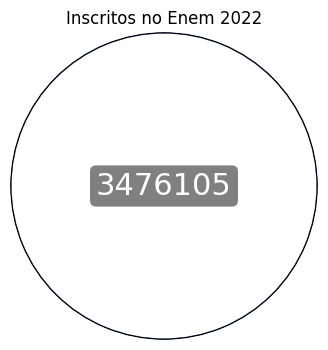

In [25]:
grafico_kpi(dados_enem_2022, 'Inscritos no Enem 2022')

### Total de inscritos por estado

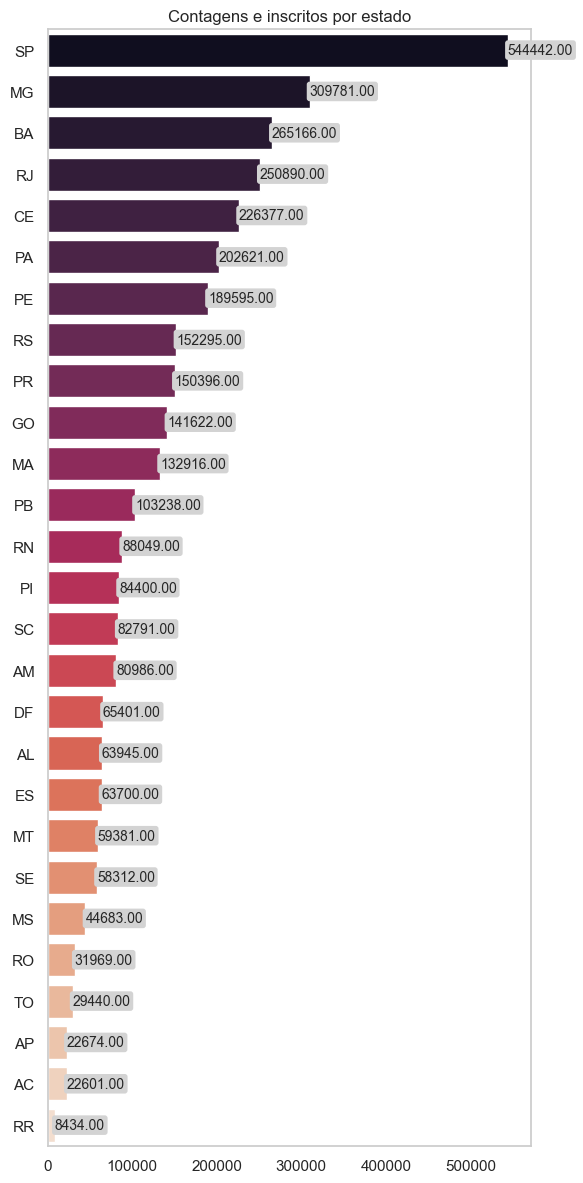

In [26]:
gerar_grafico_barras_horizontais(dados_enem_2022, 'SG_UF_PROVA', 'Estado', 'Contagens e inscritos por estado', lambda x: x.count(), ascend=False, figsize=(6, 12))

### Total de inscritos por Região

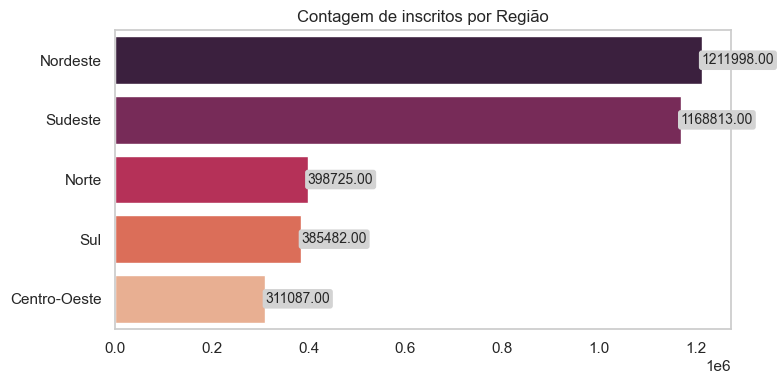

In [27]:
gerar_grafico_barras_horizontais(dados_enem_2022, 'Regiao', 'Região', 'Contagem de inscritos por Região', lambda x: x.count(), ascend=False, figsize=(8, 4))

### Inscritos por grupos de Idade

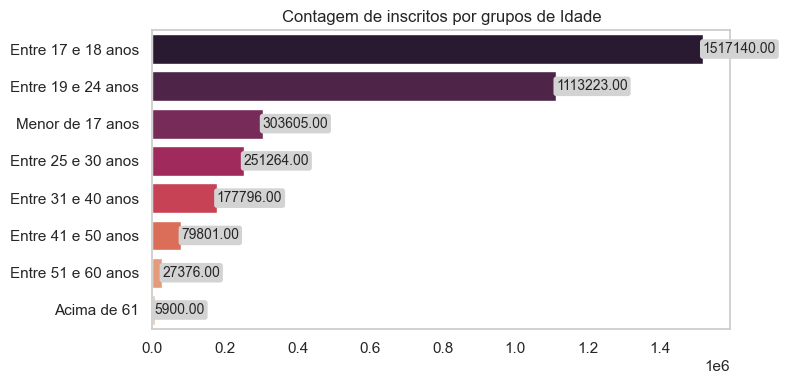

In [28]:
gerar_grafico_barras_horizontais(dados_enem_2022, 'label_idade', 'Grupo de Idade', 'Contagem de inscritos por grupos de Idade', lambda x: x.count(), ascend=False, figsize=(8, 4))

### Inscritos por sexo

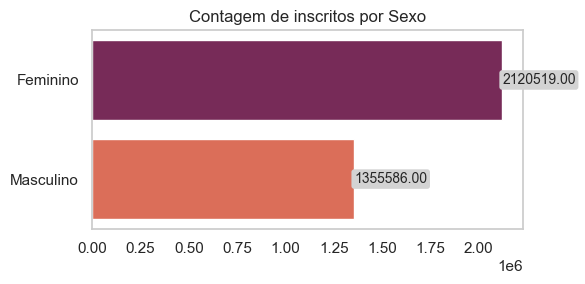

In [29]:
gerar_grafico_barras_horizontais(dados_enem_2022, 'TP_SEXO', 'Sexo', 'Contagem de inscritos por Sexo', lambda x: x.count(), ascend=False, figsize=(6, 3))

### Inscritos treineiros

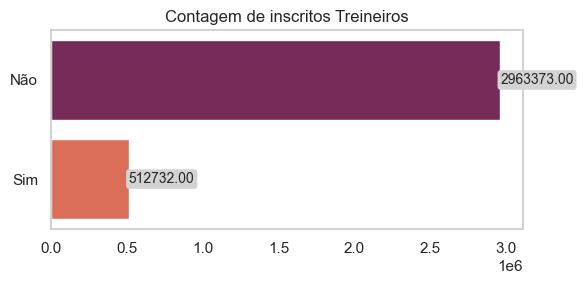

In [30]:
gerar_grafico_barras_horizontais(dados_enem_2022, 'IN_TREINEIRO', 'Treineiro', 'Contagem de inscritos Treineiros', lambda x: x.count(), ascend=False, figsize=(6, 3))

### Inscritos por Raça/Cor

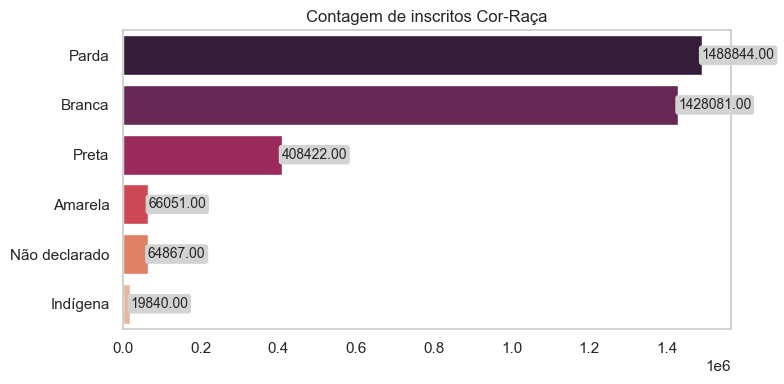

In [31]:
gerar_grafico_barras_horizontais(dados_enem_2022, 'TP_COR_RACA', 'Treineiro', 'Contagem de inscritos Cor-Raça', lambda x: x.count(), ascend=False, figsize=(8, 4))

### Inscritos por Classe Social

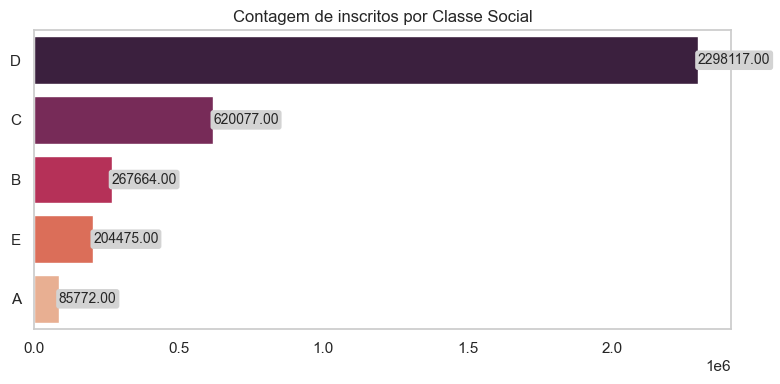

In [32]:
gerar_grafico_barras_horizontais(dados_enem_2022, 'classe_social', 'Classe Social', 'Contagem de inscritos por Classe Social', lambda x: x.count(), ascend=False, figsize=(8, 4))

#### Distribuição de inscritos por classe social e Região

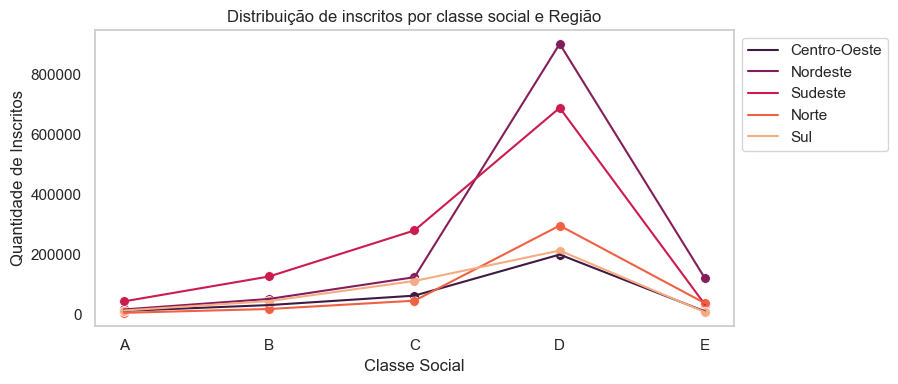

In [33]:
gerar_grafico_linhas(gerar_contagem(dados_enem_2022, 'Regiao'), 'Distribuição de inscritos por classe social e Região')

#### Distribuição de inscritos por classe social e Grupos de Idade

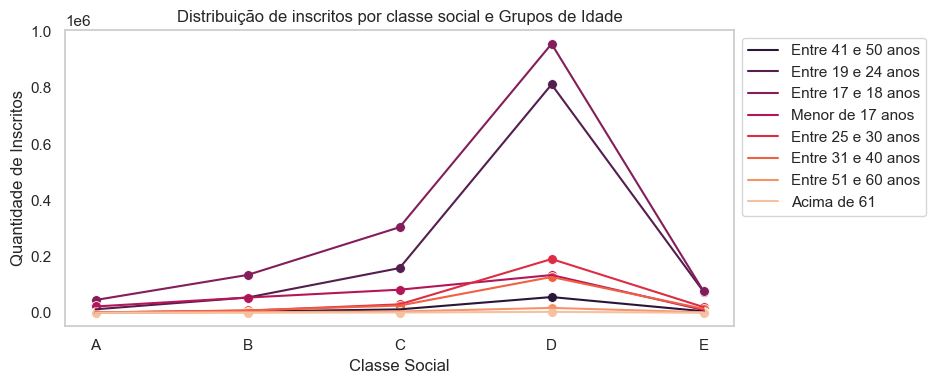

In [34]:
gerar_grafico_linhas(gerar_contagem(dados_enem_2022, 'label_idade'), 'Distribuição de inscritos por classe social e Grupos de Idade')

#### Distribuição de inscritos por classe social e Sexo

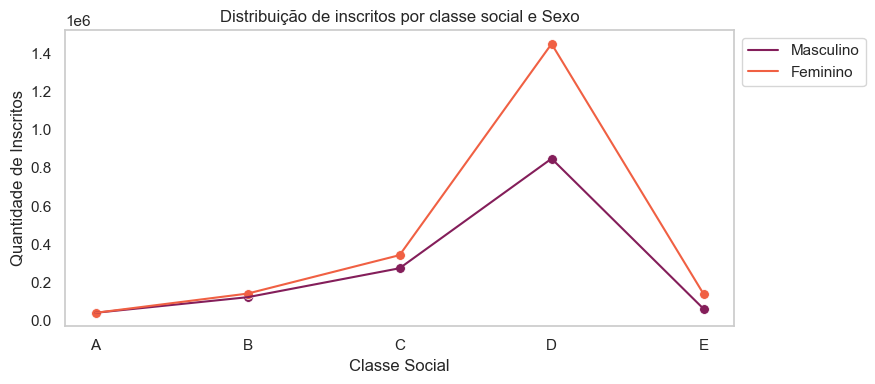

In [35]:
gerar_grafico_linhas(gerar_contagem(dados_enem_2022, 'TP_SEXO'), 'Distribuição de inscritos por classe social e Sexo')

#### Distribuição de inscritos por classe social e Treineiro

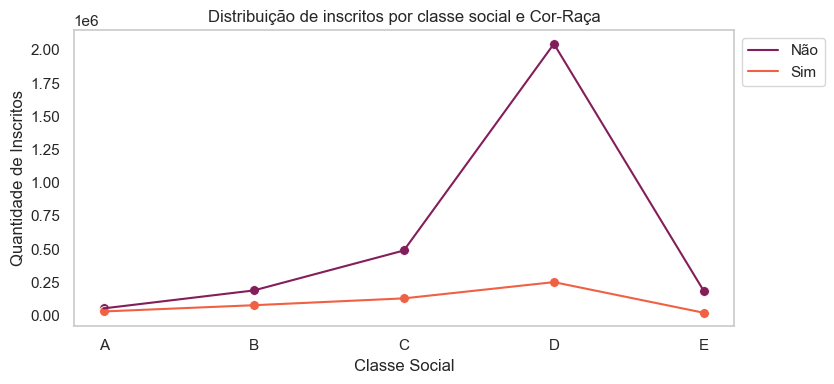

In [36]:
gerar_grafico_linhas(gerar_contagem(dados_enem_2022, 'IN_TREINEIRO'), 'Distribuição de inscritos por classe social e Cor-Raça')

#### Distribuição de inscritos por classe social e Cor/Raça

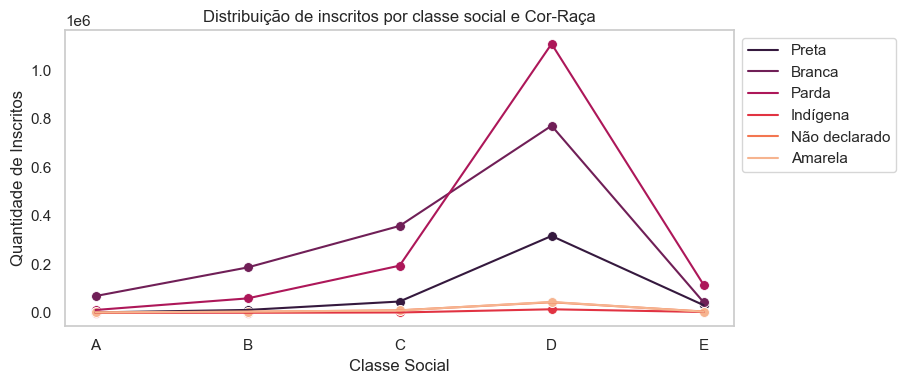

In [37]:
gerar_grafico_linhas(gerar_contagem(dados_enem_2022, 'TP_COR_RACA'), 'Distribuição de inscritos por classe social e Cor-Raça')

### Presença de inscritos nos dias de prova por Classe Social

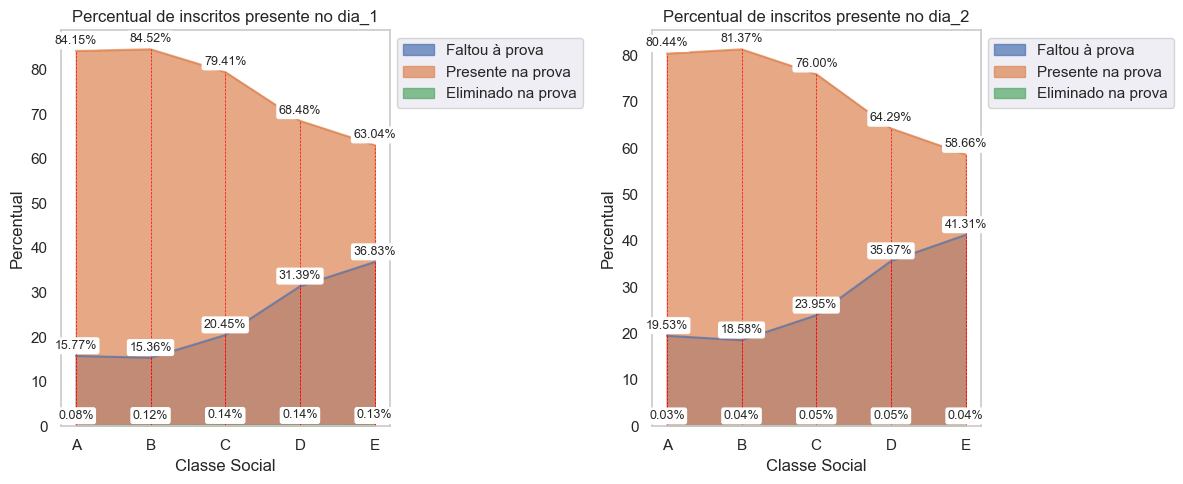

In [38]:
lista_dias = ['dia_1', 'dia_2']

gerar_grafico_area_comparativo(dados_enem_2022, lista_dias)

## Análise das notas por Classe Social

Observação: Optei por utilizar somente as notas finais difente de zero para não ter um impacto nas médias finais por categoria

### Total de inscritos sem nota final igual à zero

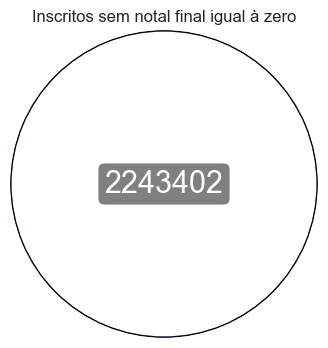

In [39]:
grafico_kpi(dados_sem_zeros, 'Inscritos sem notal final igual à zero')

### Corelação entre as notas por matéria e nota final

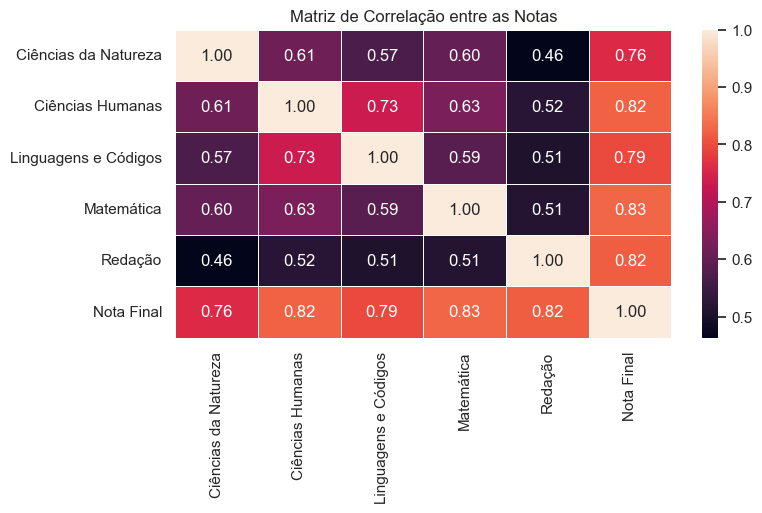

In [40]:
gerar_matriz_correlacao_notas(dados_sem_zeros)

### Média de Nota final por Classe Social

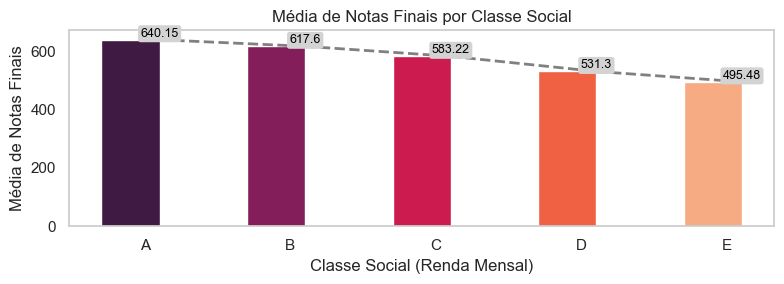

In [41]:
gerar_grafico_media_notas_final(dados_sem_zeros)

### Distribuição das notas por matérias e classe social

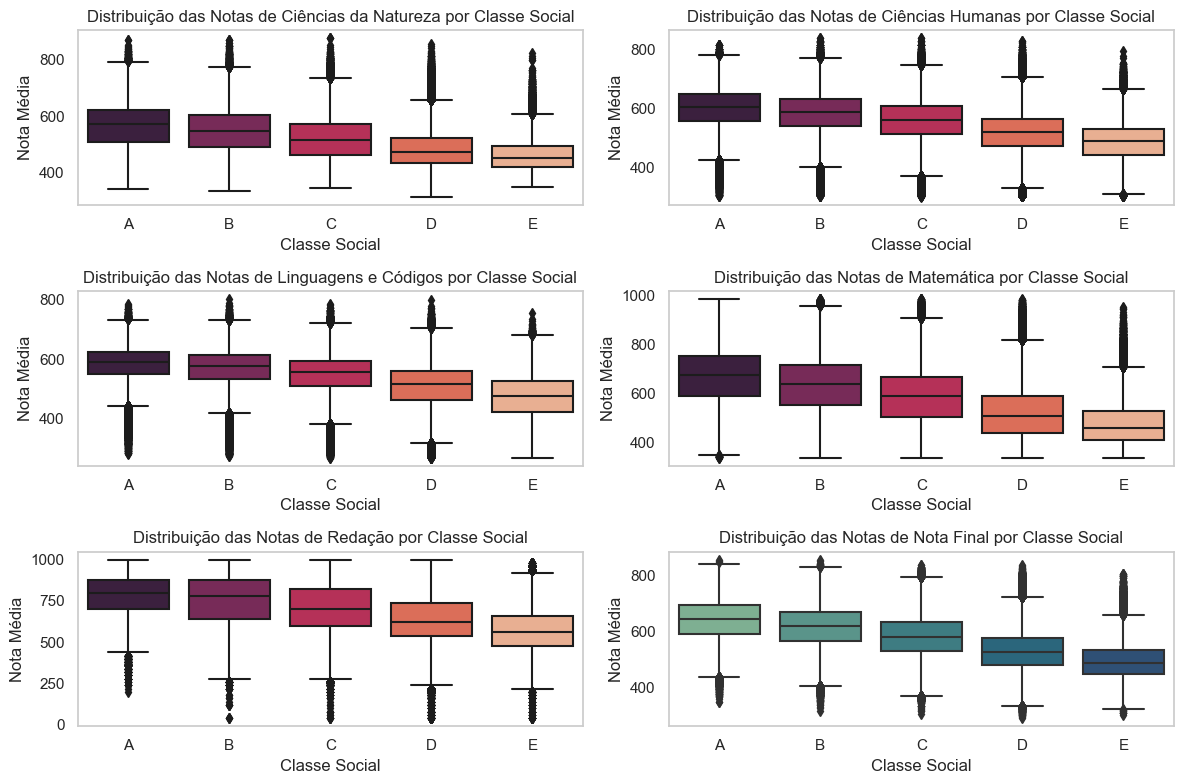

In [42]:
gerar_boxplot_comparativo(dados_sem_zeros)

### Dispersão das notas por matérias em relação a nota final por classe social

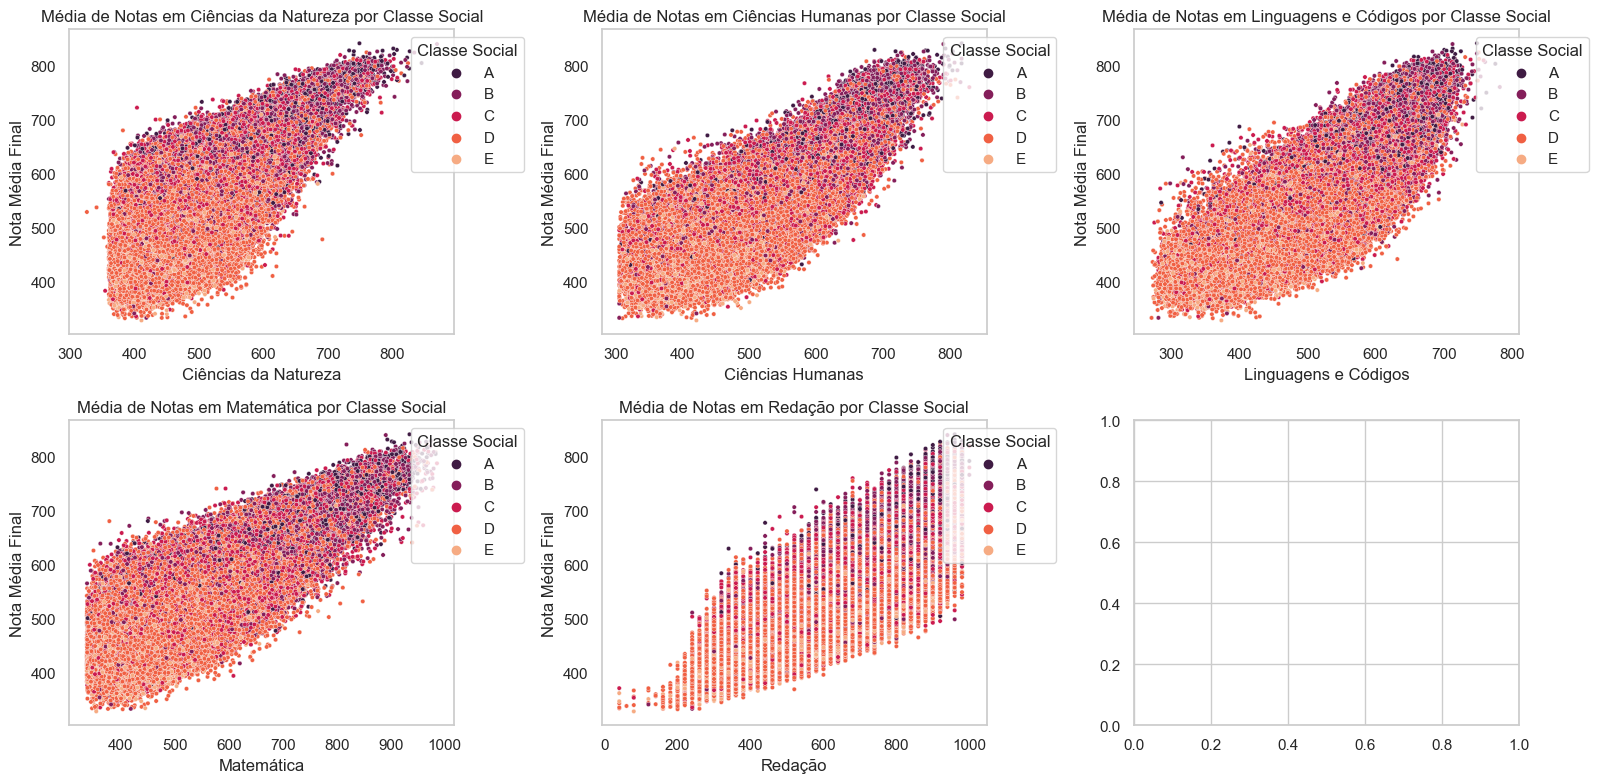

In [43]:
gerar_grafico_dispersao(dados_sem_zeros)

#### Distribuição das notas por Classe Social e Região

##### Mapa de calor da média de nota final por Classe Social e Região

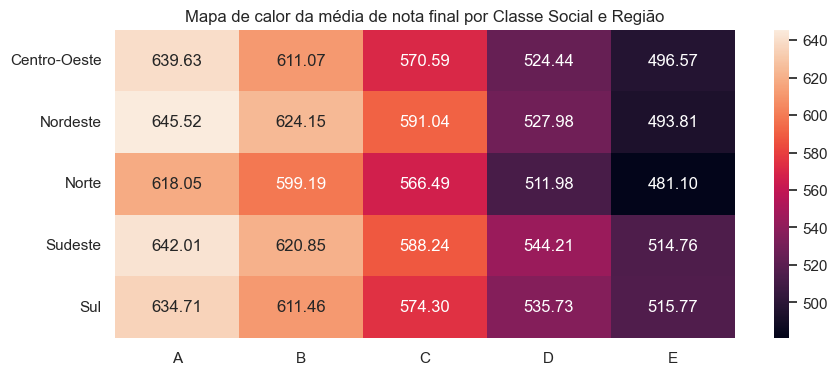

In [44]:
gerar_mapa_de_calor(dados_sem_zeros, 'Regiao', 'classe_social', 'nota_media_final', 'Mapa de calor da média de nota final por Classe Social e Região')

##### Comparativo média de notas por Região em cada Classe Social

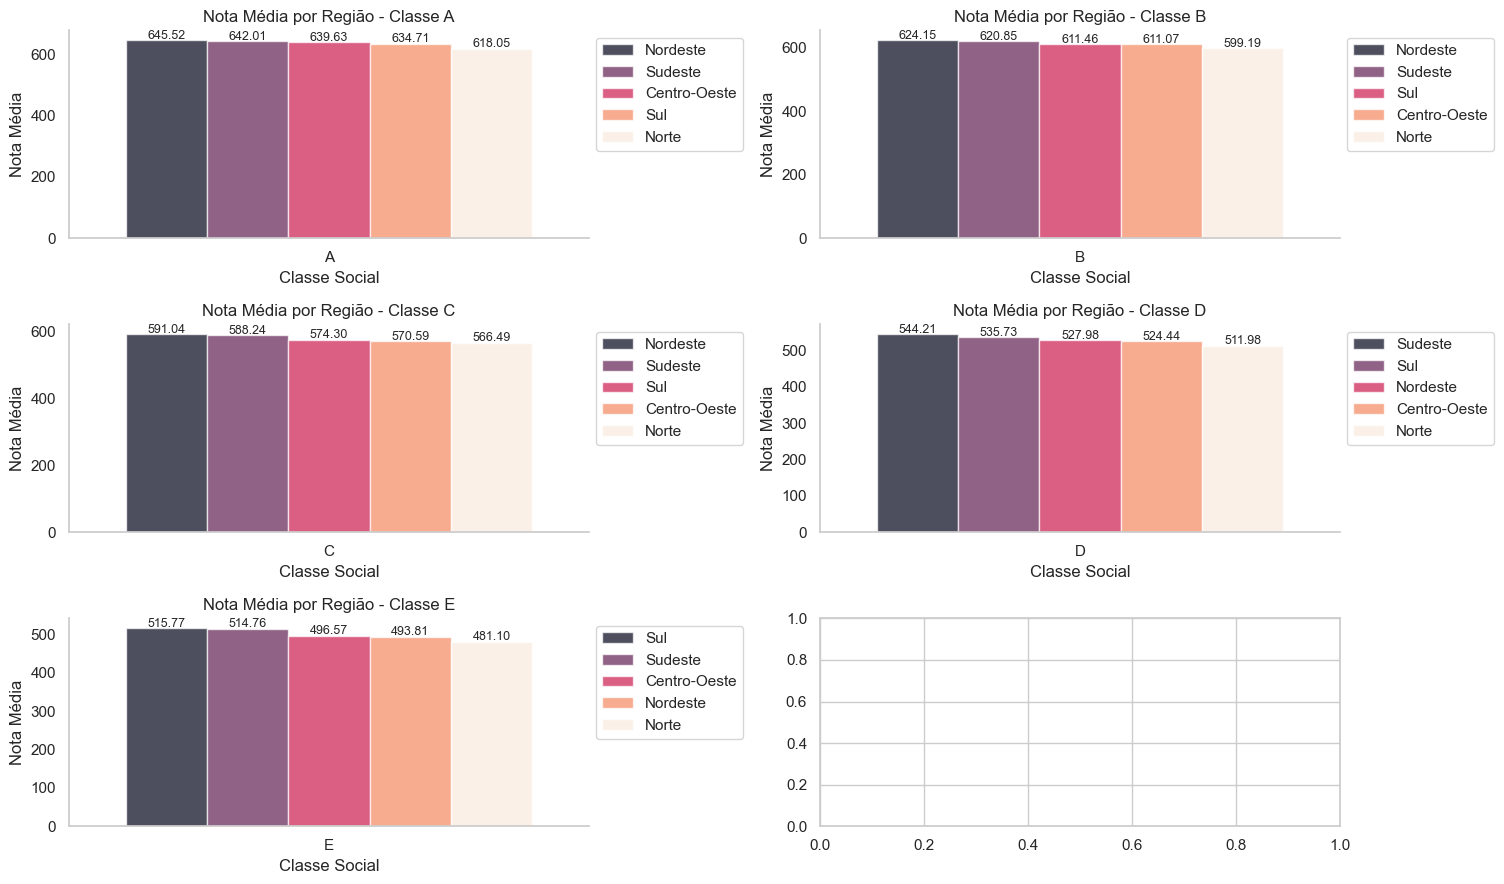

In [45]:
gerar_grafico_barras_classe_social_comparativo(dados_sem_zeros, 'Regiao', 'Região')

##### Mapa de calor da média de nota final por Classe Social e Grupo de Idade

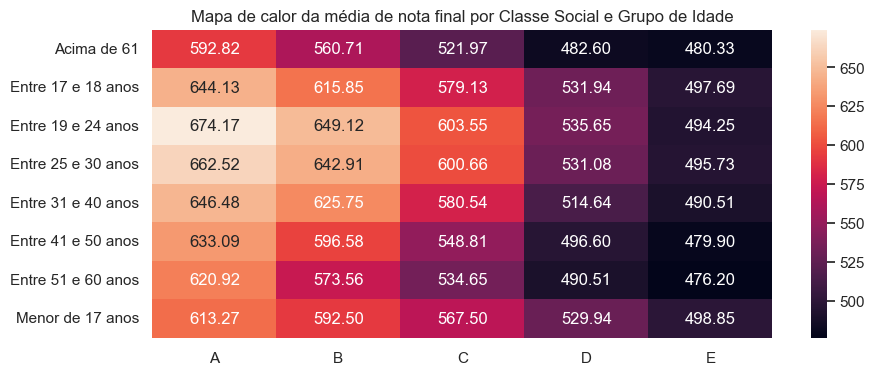

In [46]:
gerar_mapa_de_calor(dados_sem_zeros, 'label_idade', 'classe_social', 'nota_media_final', 'Mapa de calor da média de nota final por Classe Social e Grupo de Idade')

##### Comparativo média de notas por Grupos de Idade em cada Classe Social

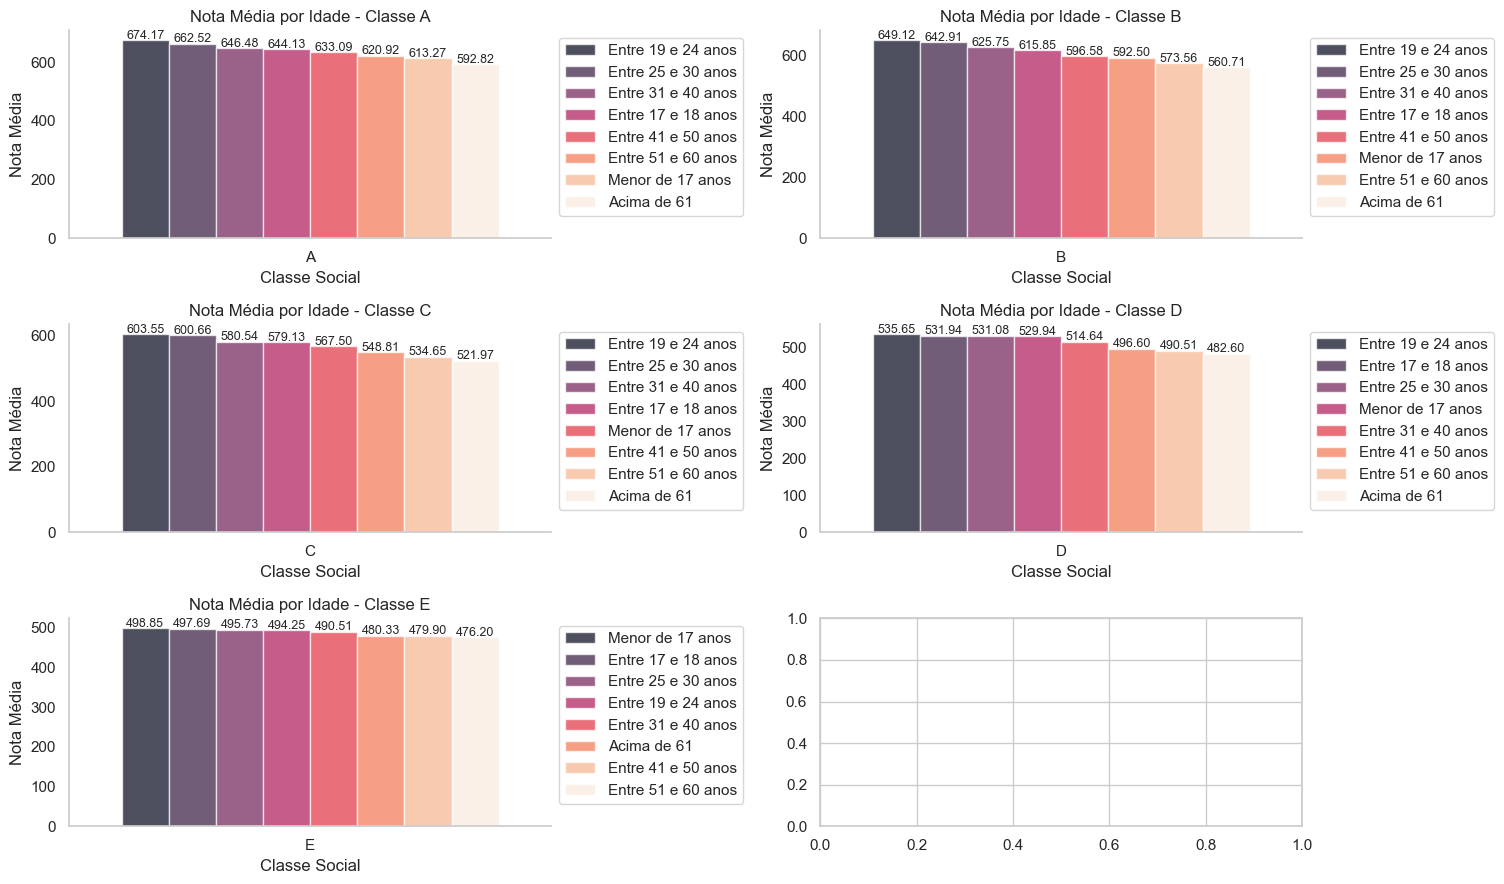

In [47]:
gerar_grafico_barras_classe_social_comparativo(dados_sem_zeros, 'label_idade', 'Idade')

##### Mapa de calor da média de nota final por Classe Social e Sexo

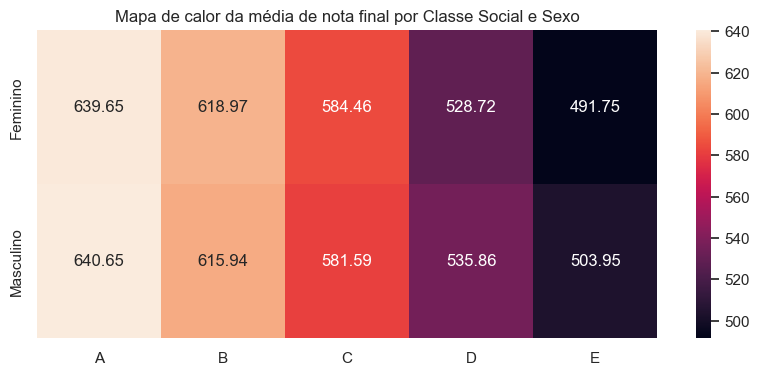

In [48]:
gerar_mapa_de_calor(dados_sem_zeros, 'TP_SEXO', 'classe_social', 'nota_media_final', 'Mapa de calor da média de nota final por Classe Social e Sexo')

##### Comparativo média de notas por Sexo em cada Classe Social

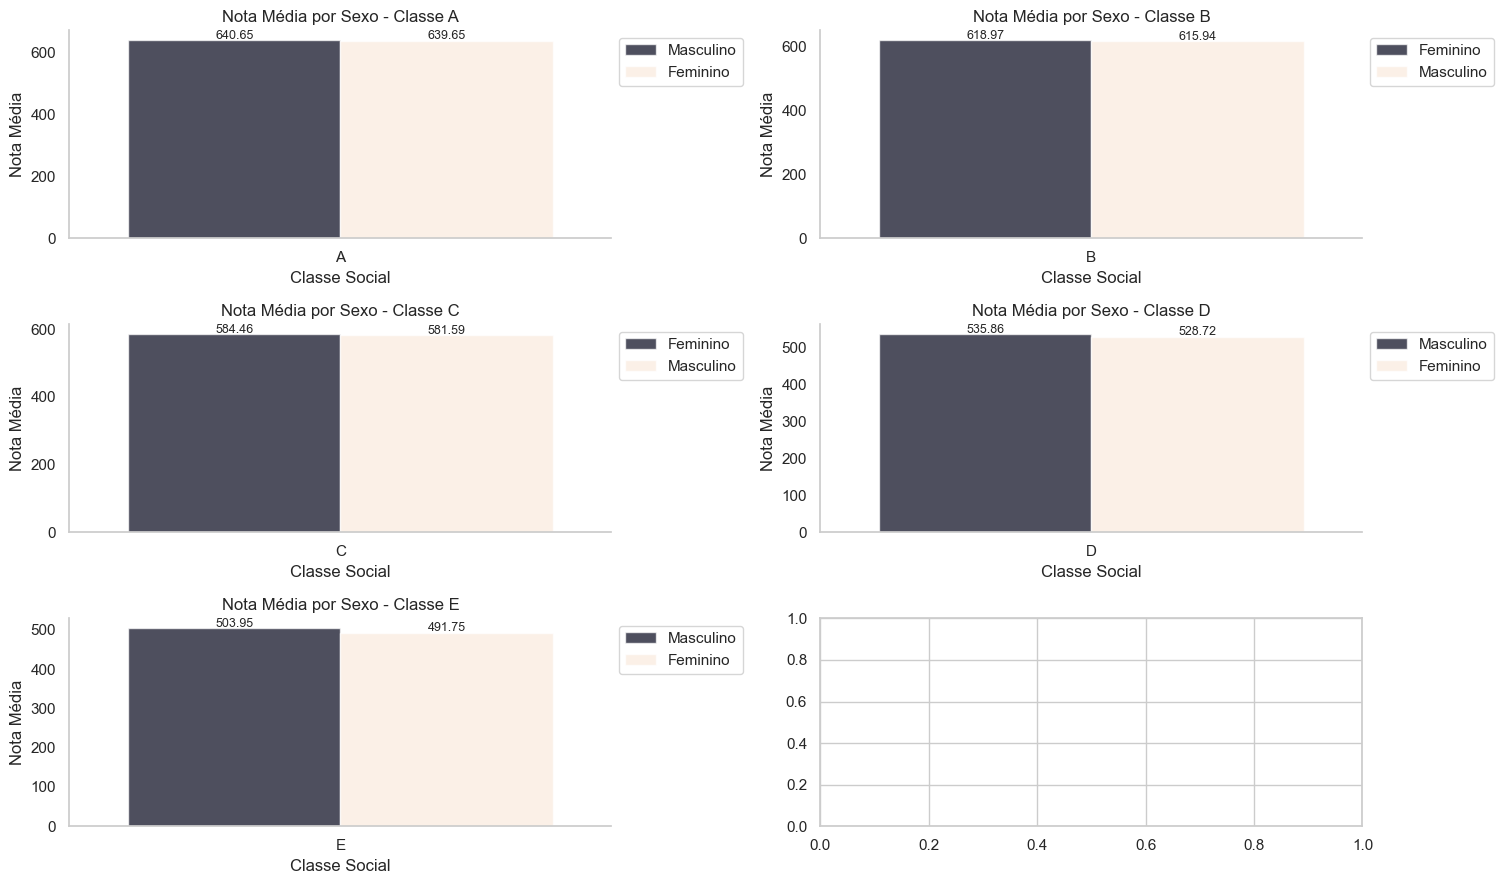

In [49]:
gerar_grafico_barras_classe_social_comparativo(dados_sem_zeros, 'TP_SEXO', 'Sexo')

##### Mapa de calor da média de nota final por Classe Social e Treineiro

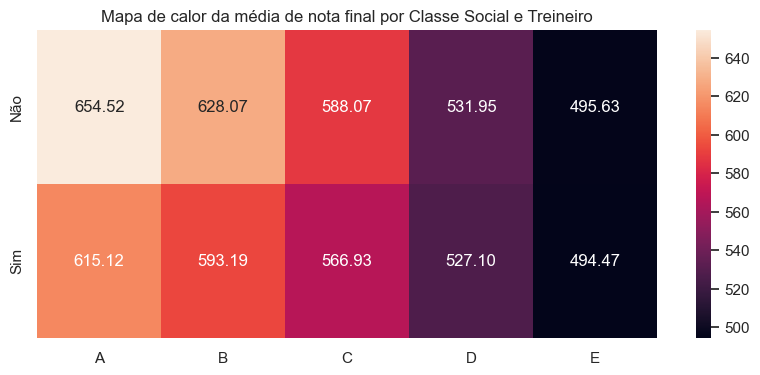

In [50]:
gerar_mapa_de_calor(dados_sem_zeros, 'IN_TREINEIRO', 'classe_social', 'nota_media_final', 'Mapa de calor da média de nota final por Classe Social e Treineiro')

##### Comparativo média de notas por Treineiro em cada Classe Social

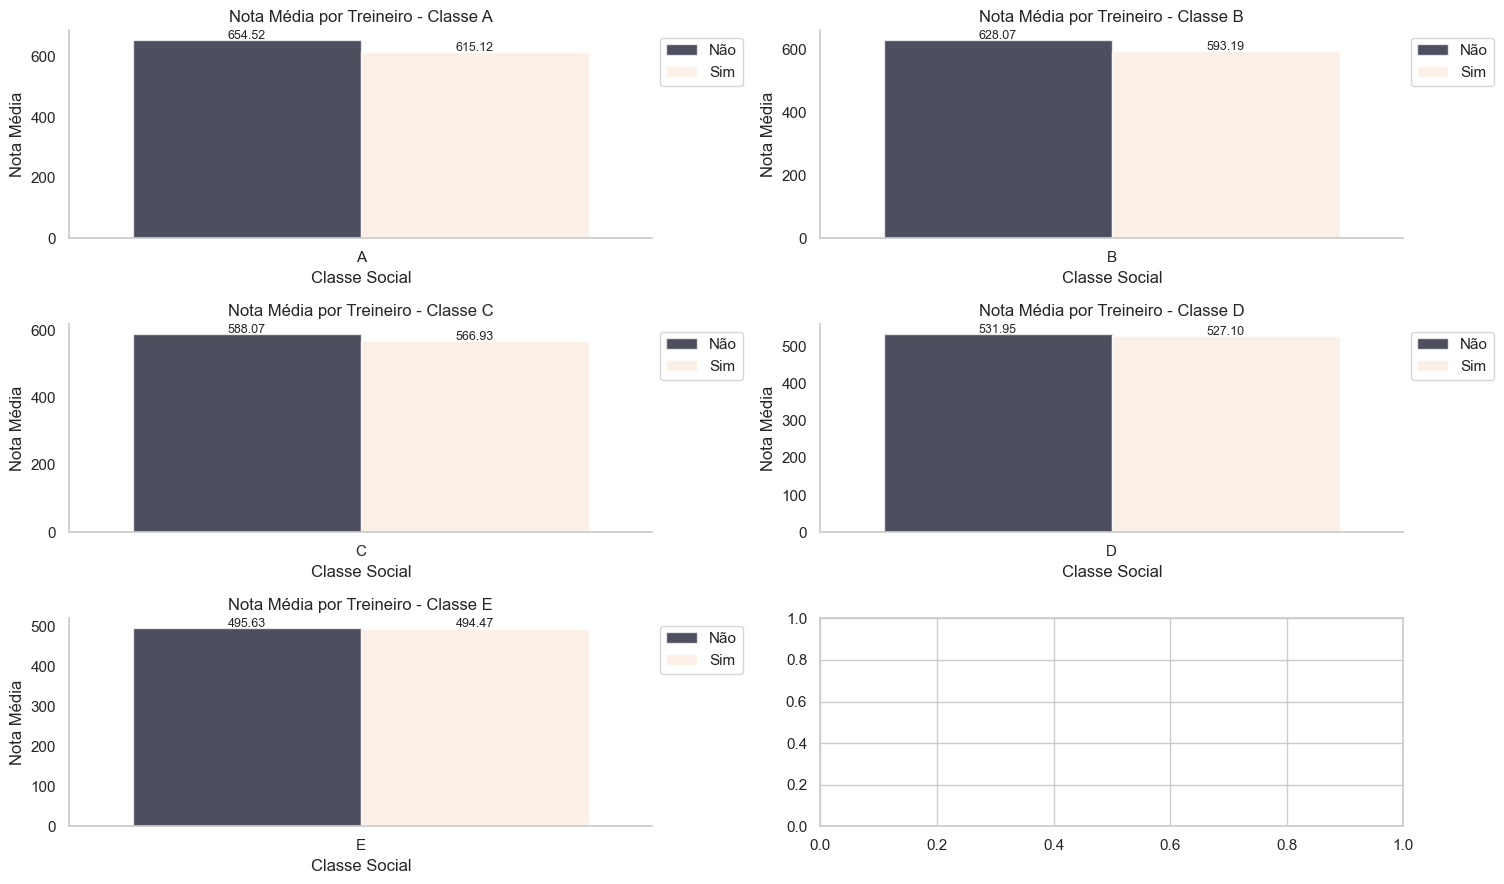

In [51]:
gerar_grafico_barras_classe_social_comparativo(dados_sem_zeros, 'IN_TREINEIRO', 'Treineiro')

##### Mapa de calor da média de nota final por Classe Social e Cor/Raça

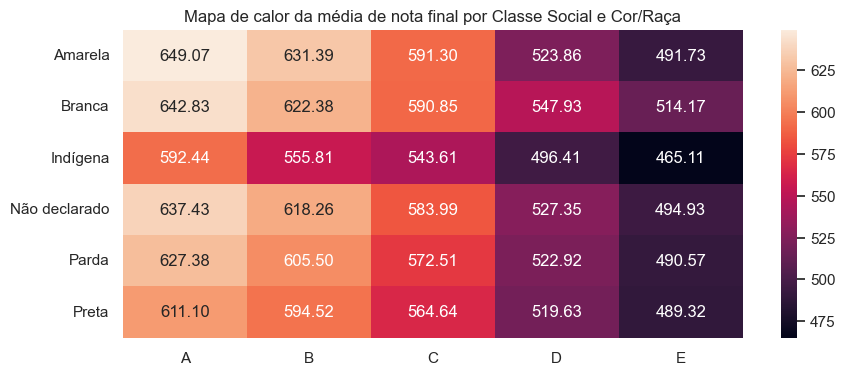

In [52]:
gerar_mapa_de_calor(dados_sem_zeros, 'TP_COR_RACA', 'classe_social', 'nota_media_final', 'Mapa de calor da média de nota final por Classe Social e Cor/Raça')

##### Comparativo média de notas por Cor/Raça em cada Classe Social

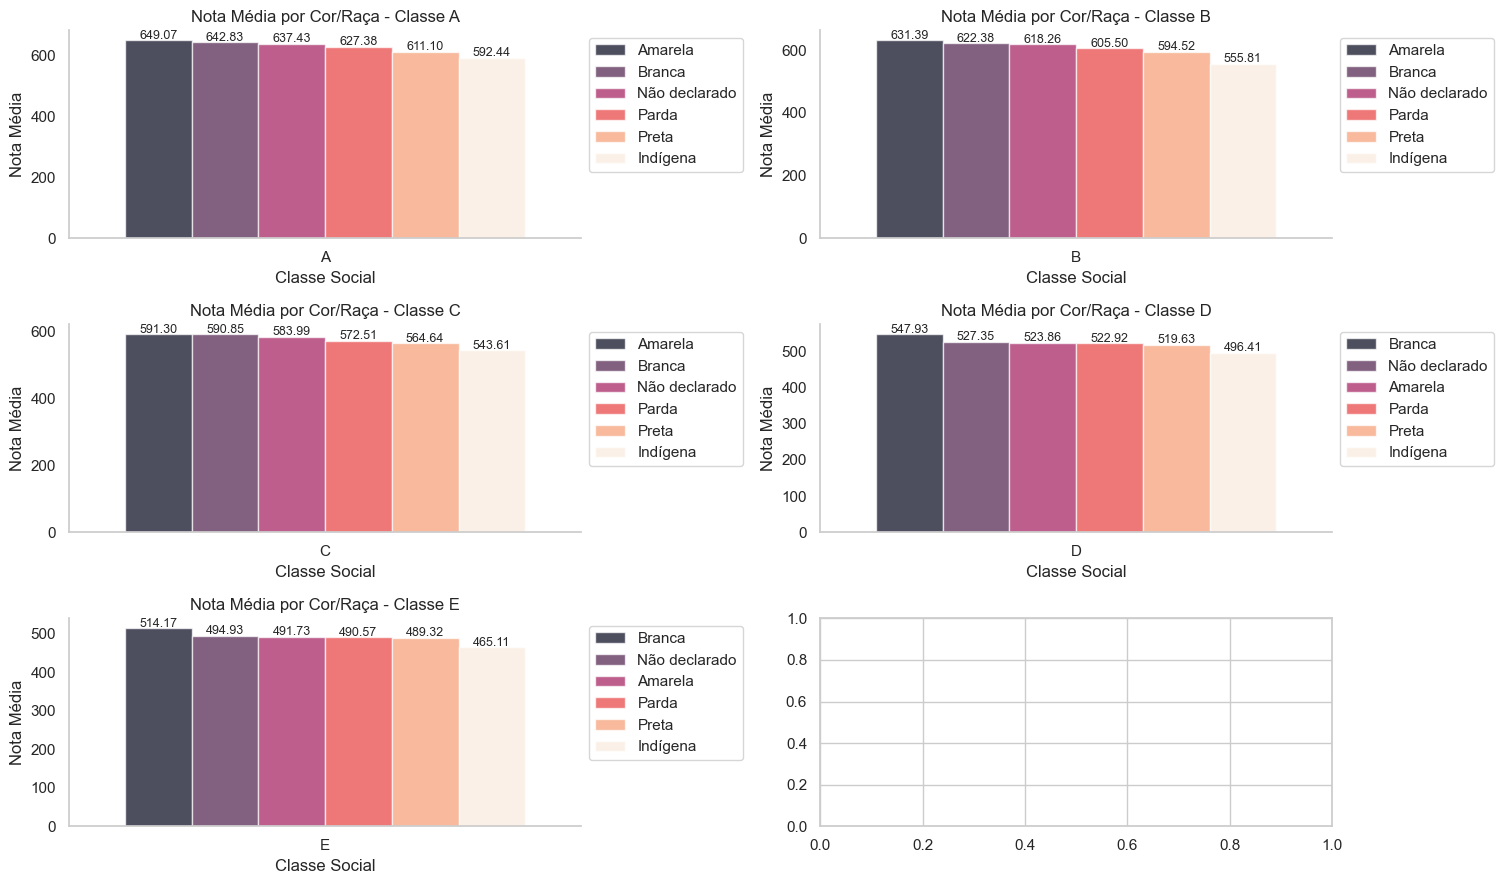

In [53]:
gerar_grafico_barras_classe_social_comparativo(dados_sem_zeros, 'TP_COR_RACA', 'Cor/Raça')

##### Média de notas por matéria e Estado

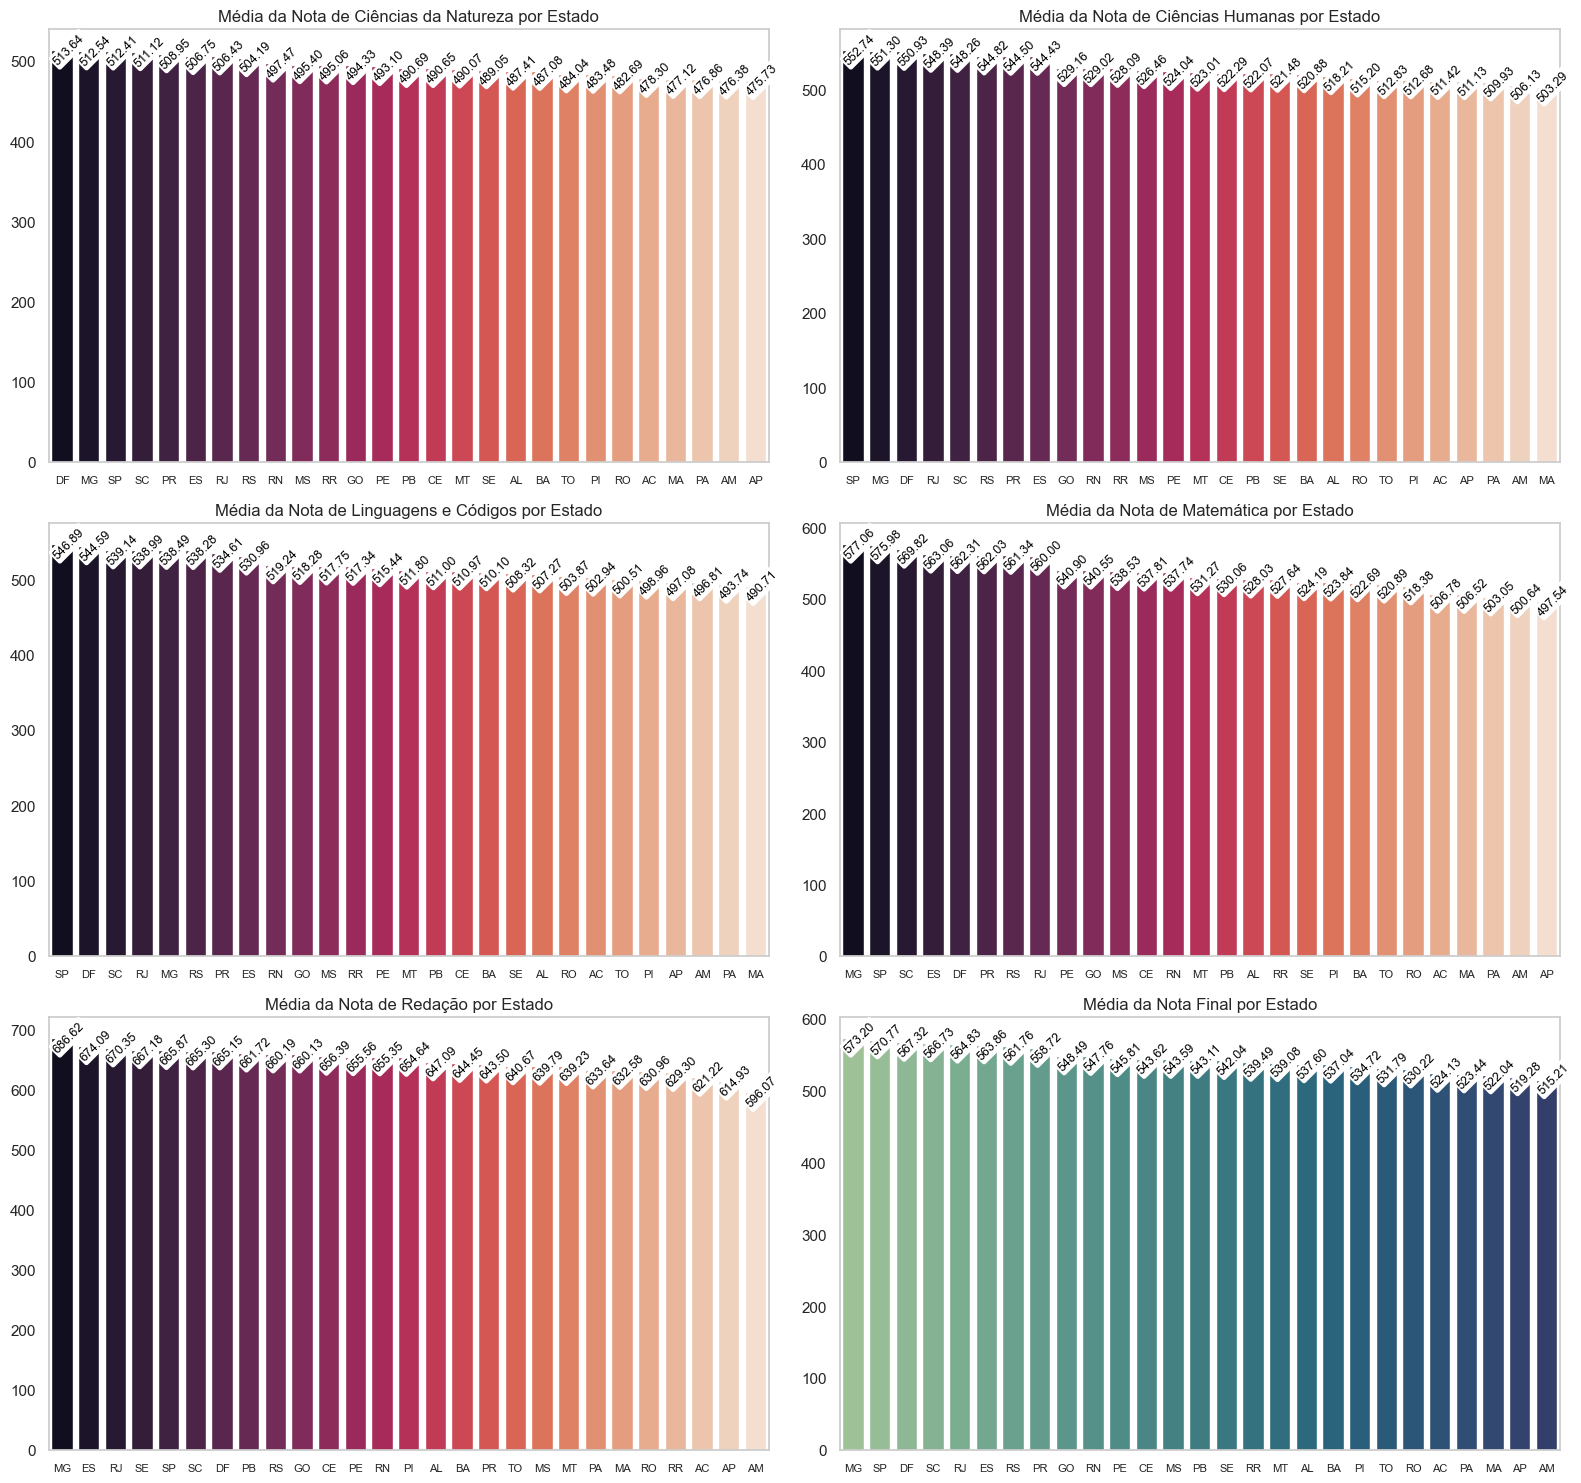

In [54]:
gerar_grafico_barras_estado(dados_sem_zeros)

##### Piores Médias de nota final por Estado

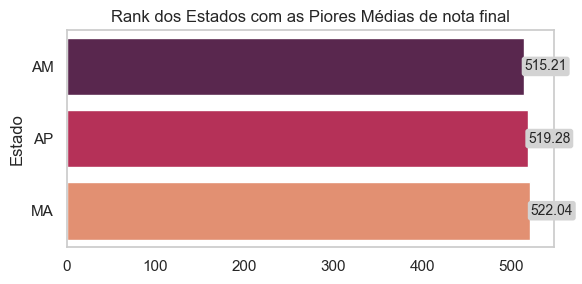

In [55]:
gerar_grafico_barras_horizontais_rank(dados_sem_zeros, 'SG_UF_PROVA', 'Estado', 'Rank dos Estados com as Piores Médias de nota final', operacao=lambda x: x.mean(), ascend=True)

##### Melhores Média de nota final por Estado

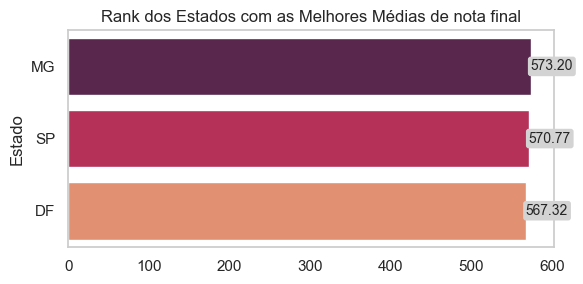

In [56]:
gerar_grafico_barras_horizontais_rank(dados_sem_zeros, 'SG_UF_PROVA', 'Estado', 'Rank dos Estados com as Melhores Médias de nota final', operacao=lambda x: x.mean(), ascend=False)

##### Mapa de calor da média de nota final por Classe Social e Melhores e Piores Estados

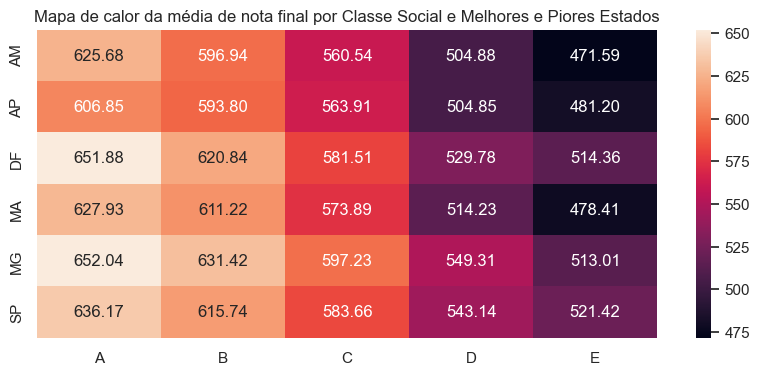

In [57]:
lista_estados = ['AM', 'AP', 'MA', 'MG', 'SP', 'DF']

gerar_mapa_de_calor(dados_sem_zeros.query("SG_UF_PROVA == @lista_estados"), 'SG_UF_PROVA', 'classe_social', 'nota_media_final', 'Mapa de calor da média de nota final por Classe Social e Melhores e Piores Estados')

##### Comparativo média de notas entre os Melhores e Piores desempenhos por estado em cada Classe Social

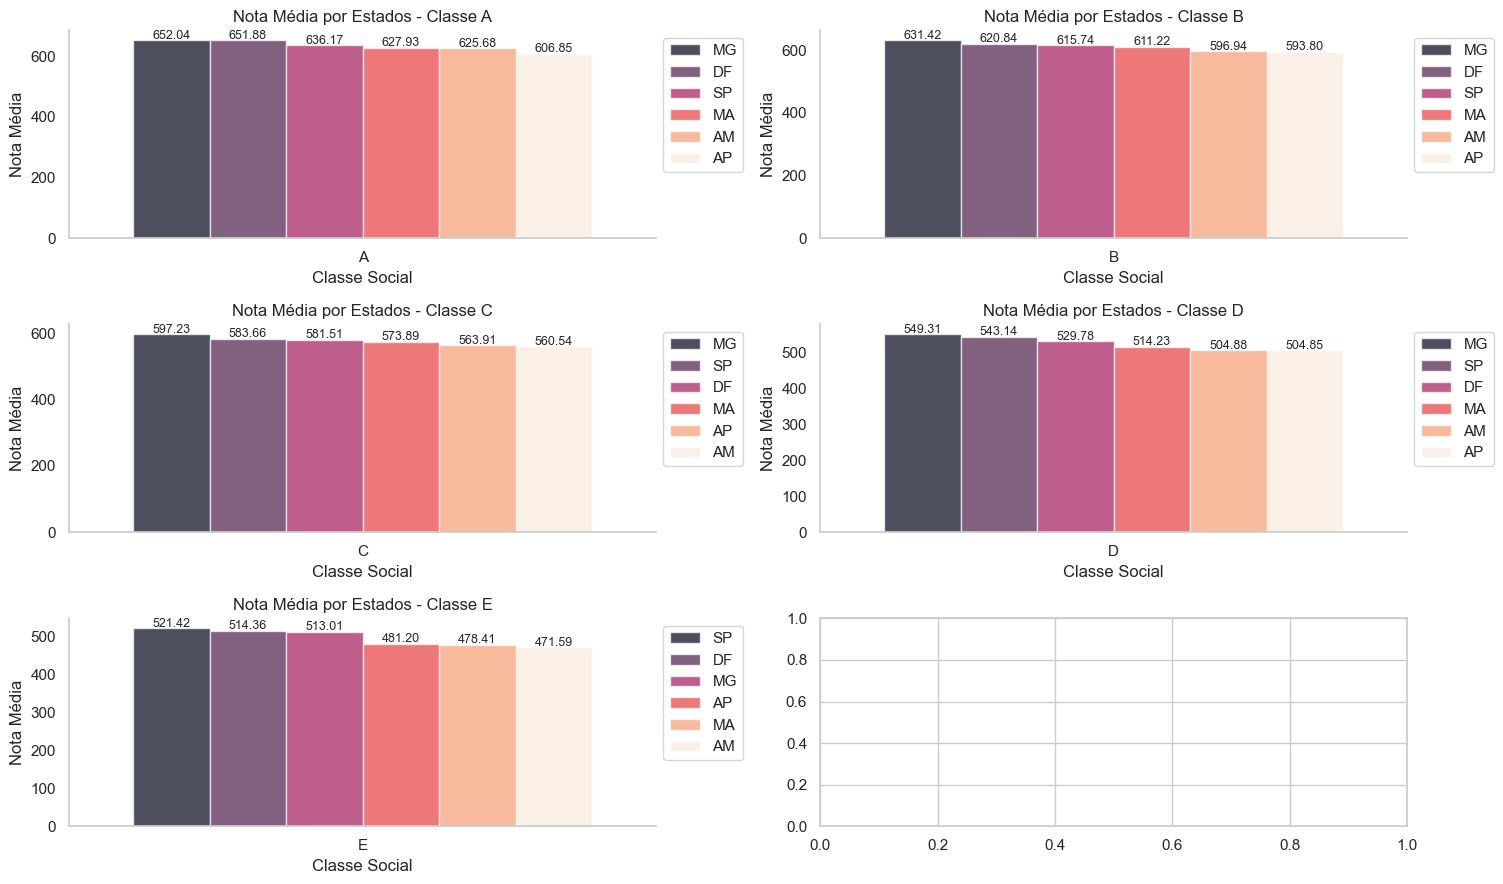

In [58]:
gerar_grafico_barras_classe_social_comparativo(dados_sem_zeros.query("SG_UF_PROVA == @lista_estados"), 'SG_UF_PROVA', 'Estados')

## Acesso à tecnologia por Classe Social

### Acesso à Internet na casa

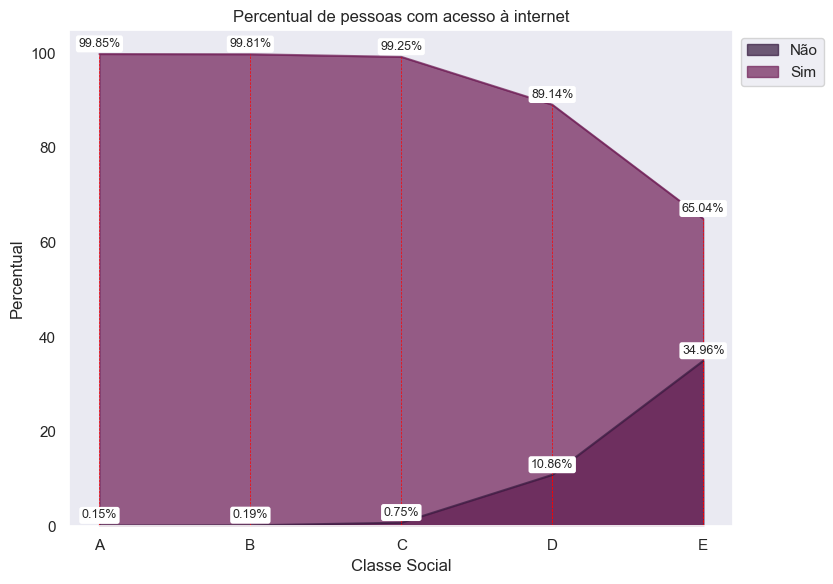

In [59]:
gerar_grafico_area(gerar_contagem(dados_enem_2022, 'acesso_internet'), 'Percentual de pessoas com acesso à internet')

### Acesso ao telefone celular na casa

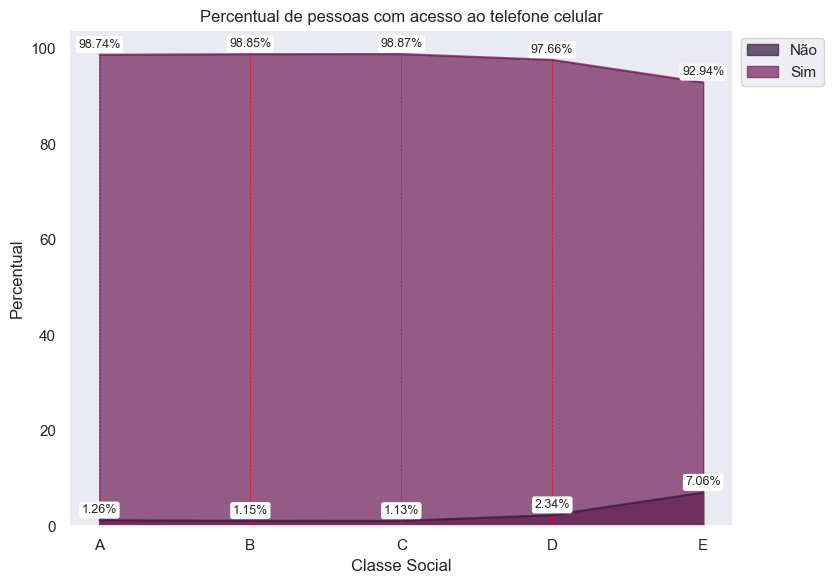

In [60]:
gerar_grafico_area(gerar_contagem(dados_enem_2022, 'telefone_celular'), 'Percentual de pessoas com acesso ao telefone celular')

### Acesso ao computador na casa

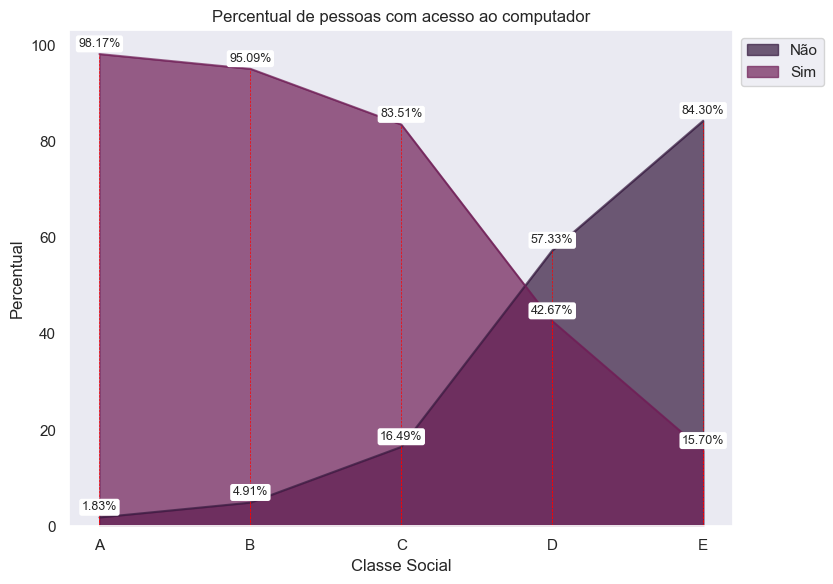

In [61]:
gerar_grafico_area(gerar_contagem(dados_enem_2022, 'computador_na_casa'), 'Percentual de pessoas com acesso ao computador')

### Observações

Pelos gráficos, é possível observar que uma parcela significativa da população das classes D e E não possui acesso à internet e computador em casa.

## Conclusões

### Formulação das Hipóteses:

Hipótese Nula (H0): A classe social não tem impacto significativo na nota média final.

Hipótese Alternativa (H1): A classe social tem impacto significativo na nota média final.

#### Regressão Linear

In [67]:
# Criar um dicionário para mapear as classes sociais para valores numéricos
mapeamento_classes = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

dados = dados_sem_zeros

# Aplicar o mapeamento ao DataFrame
dados['classe_social_numerica'] = dados['classe_social'].map(mapeamento_classes)

# Definir variáveis independentes (X) e dependente (y)
X = dados[['classe_social_numerica']]
y = dados['nota_media_final']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       nota_media_final   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                 5.300e+05
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:22:00   Log-Likelihood:            -1.2788e+07
No. Observations:             2243402   AIC:                         2.558e+07
Df Residuals:                 2243400   BIC:                         2.558e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    699

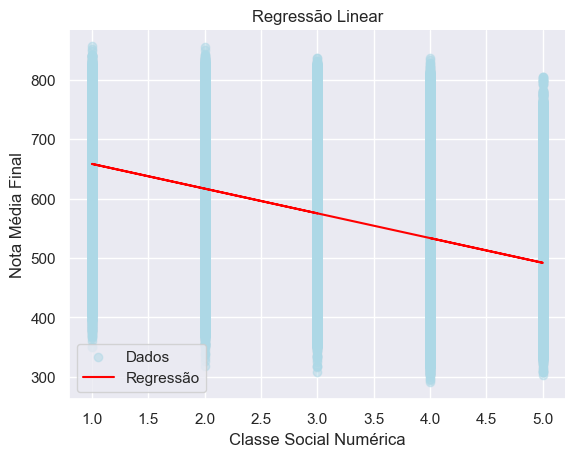

In [69]:
# Define o estilo do Seaborn
sns.set_style("darkgrid")

# Scatter plot
plt.scatter(dados['classe_social_numerica'], dados['nota_media_final'], alpha=0.5, color='lightblue', label='Dados')

# Linha de regressão
plt.plot(dados['classe_social_numerica'], results.predict(), color='red', label='Regressão')

# Adiciona rótulos e título
plt.xlabel('Classe Social Numérica')
plt.ylabel('Nota Média Final')
plt.title('Regressão Linear')

# Adiciona legenda
plt.legend()

# Remove as bordas
sns.despine()

# Salvando a figura com o nome do título
plt.savefig('Regressão Linear.png', transparent=False, dpi=300, bbox_inches='tight')

# Exibe o gráfico
plt.show()


### Conclusão final

Com base na análise visual dos gráficos durante os estudos e os resultados da análise de regressão linear, podemos concluir que a variável "classe social" tem uma influência estatisticamente significativa na nota média final dos indivíduos. Tornando a  Hipótese Alternativa (H1): A classe social tem impacto significativo na nota média final válida.

O coeficiente associado à variável que representa a classe social é de -41.6205, o que indica que, mantendo todas as outras variáveis constantes, um aumento de uma unidade na classe social está associado a uma diminuição de aproximadamente 41.62 pontos na nota média final (Na média quanto menor for a classe social, menor será a nota final).

Além disso, o valor p muito baixo (0.000) indica que essa relação não é devida ao acaso, reforçando a significância estatística da associação.

Esses resultados sugerem que a classe social desempenha um papel importante no desempenho educacional dos indivíduos na amostra analisada. Portanto, estratégias e políticas voltadas para a redução das disparidades socioeconômicas podem ter um impacto positivo no desempenho acadêmico dos estudantes.

## Referências

Microdados Enem 2022: https://www.gov.br/inep/pt-br/assuntos/noticias/enem/divulgados-microdados-do-enem-2022

Preparação dos dados: https://github.com/njocimar28/enem_2022/blob/a552896391264ad0976a3951d8e46e89ce4e0915/ENEM%202022%20-%20Prepara%C3%A7%C3%A3o%20dos%20dados.ipynb